## Importing Libraries

In [8]:
# Import basic libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

## Importing Data Set

In [9]:
dataset = pd.read_csv('dataset/clean-sleep-efficiency.csv')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,alcohol_consumption_filled,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,0.0,Yes,3.0,3.0,1,1.0,7,7.0,1,0
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,3.0,Yes,3.0,3.0,2,2.0,9,9.0,1,1
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,0.0,No,3.0,3.0,21,21.0,5,5.0,0,0
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,5.0,Yes,1.0,1.0,2,2.0,8,8.0,1,0
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,3.0,No,3.0,3.0,1,1.0,9,9.0,0,1


## Relationship between Age & Gender and Sleep Efficiency

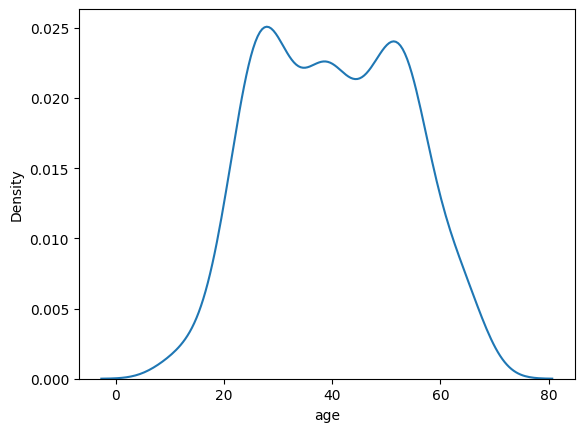

In [10]:
sb.kdeplot(dataset['age'])
plt.show()

From the KDE plot, we can deduce that majority of the test subjects lie between 20 years old and 60 years old.

<Axes: xlabel='age', ylabel='sleep_efficiency'>

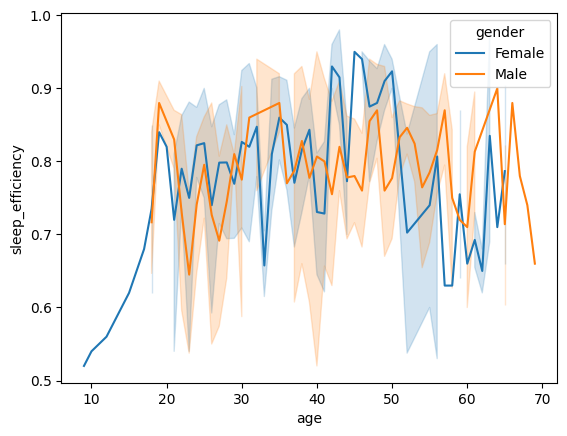

In [11]:
sb.lineplot(data = dataset, x = 'age', y='sleep_efficiency', hue='gender')

From the lineplot, we can observe the trend that women's sleep efficiency peaks in their 40s while men in their 60s.

## Sleep Percentages

### Relationship between Sleep Duration and Sleep Percentages

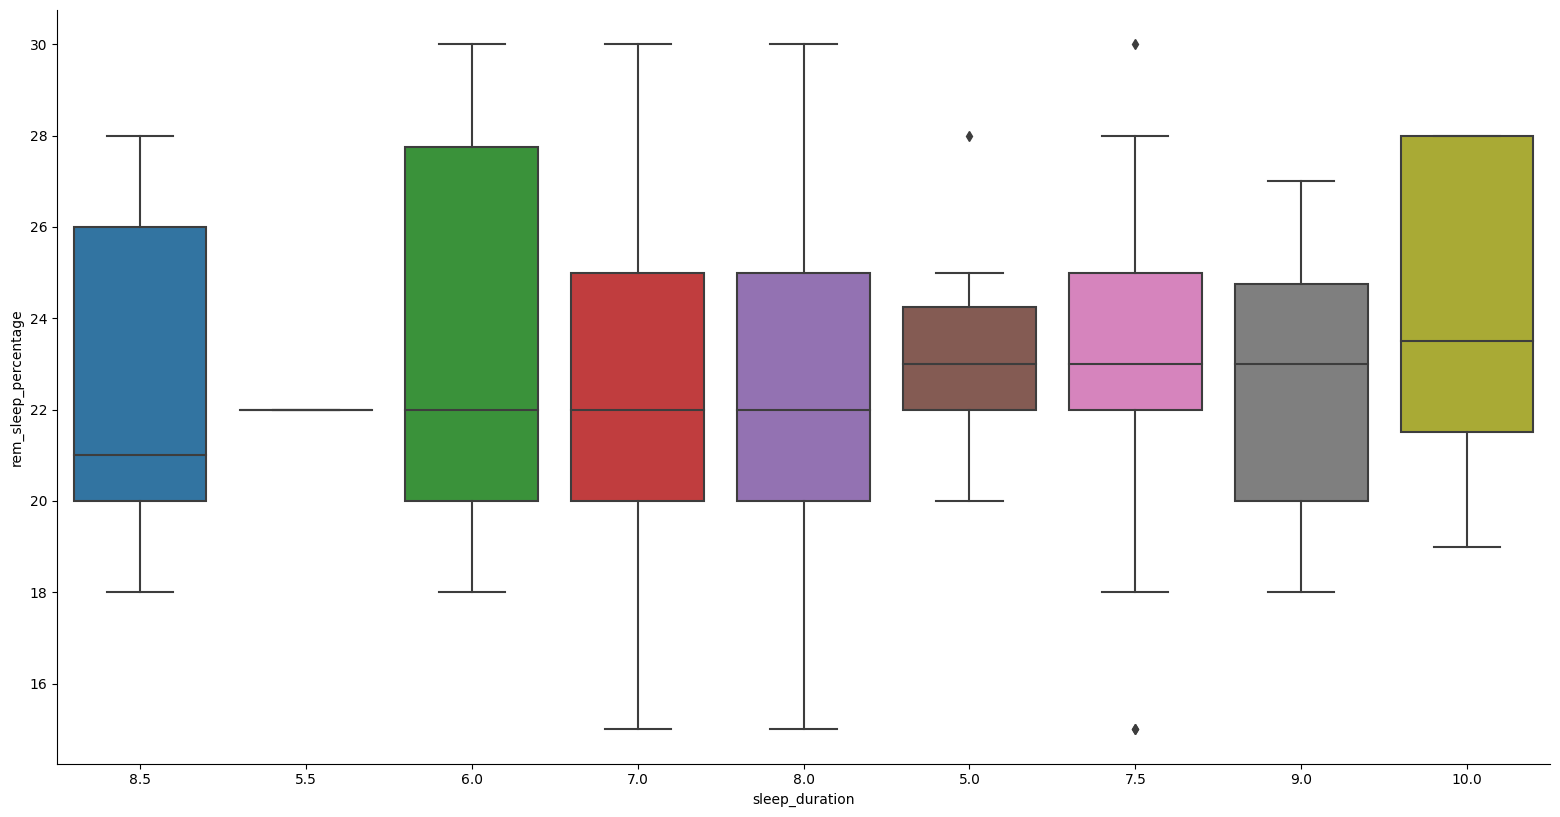

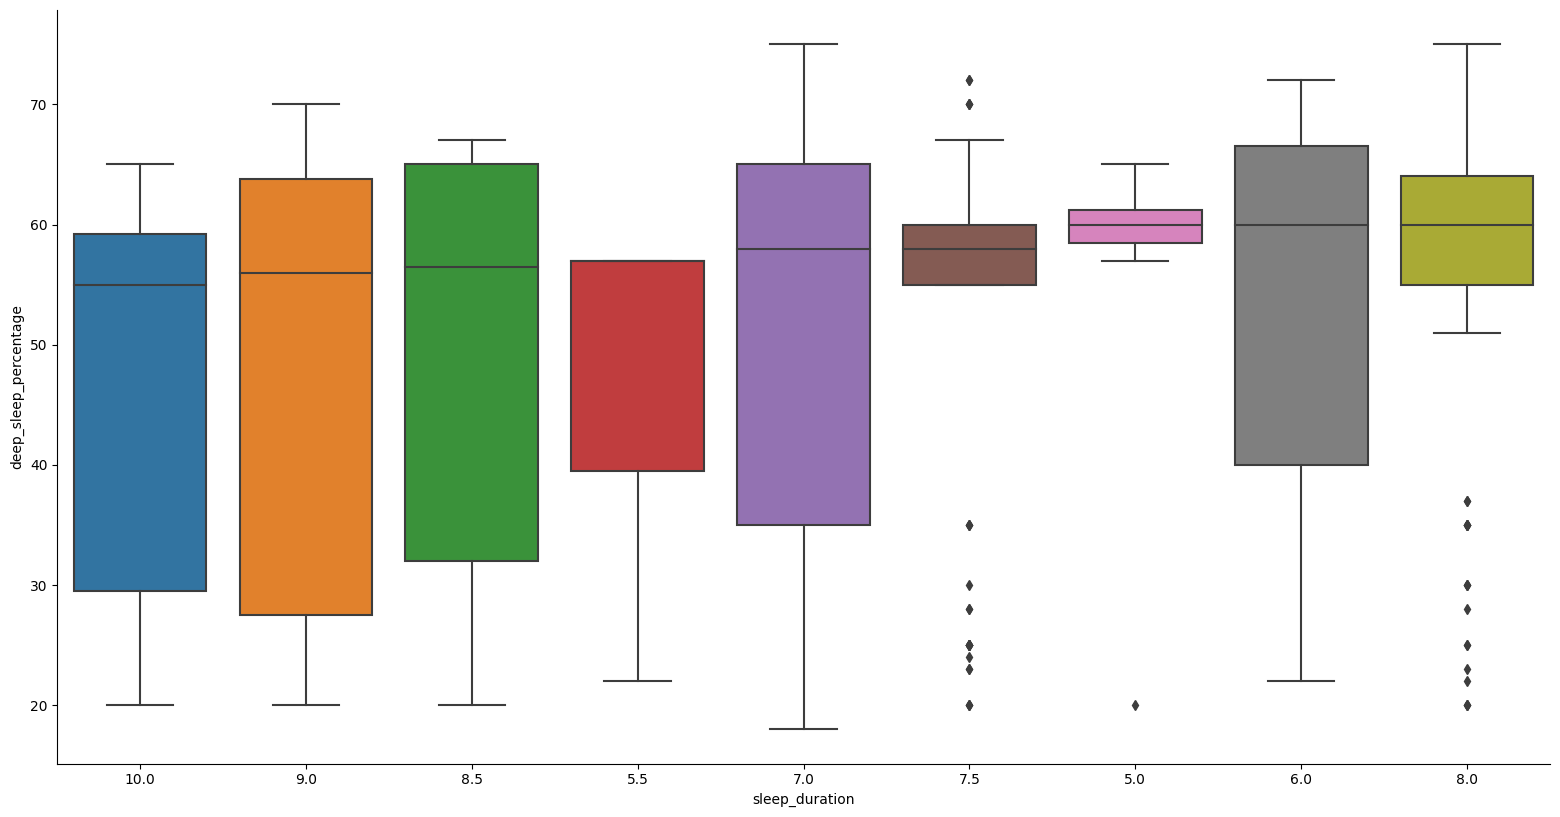

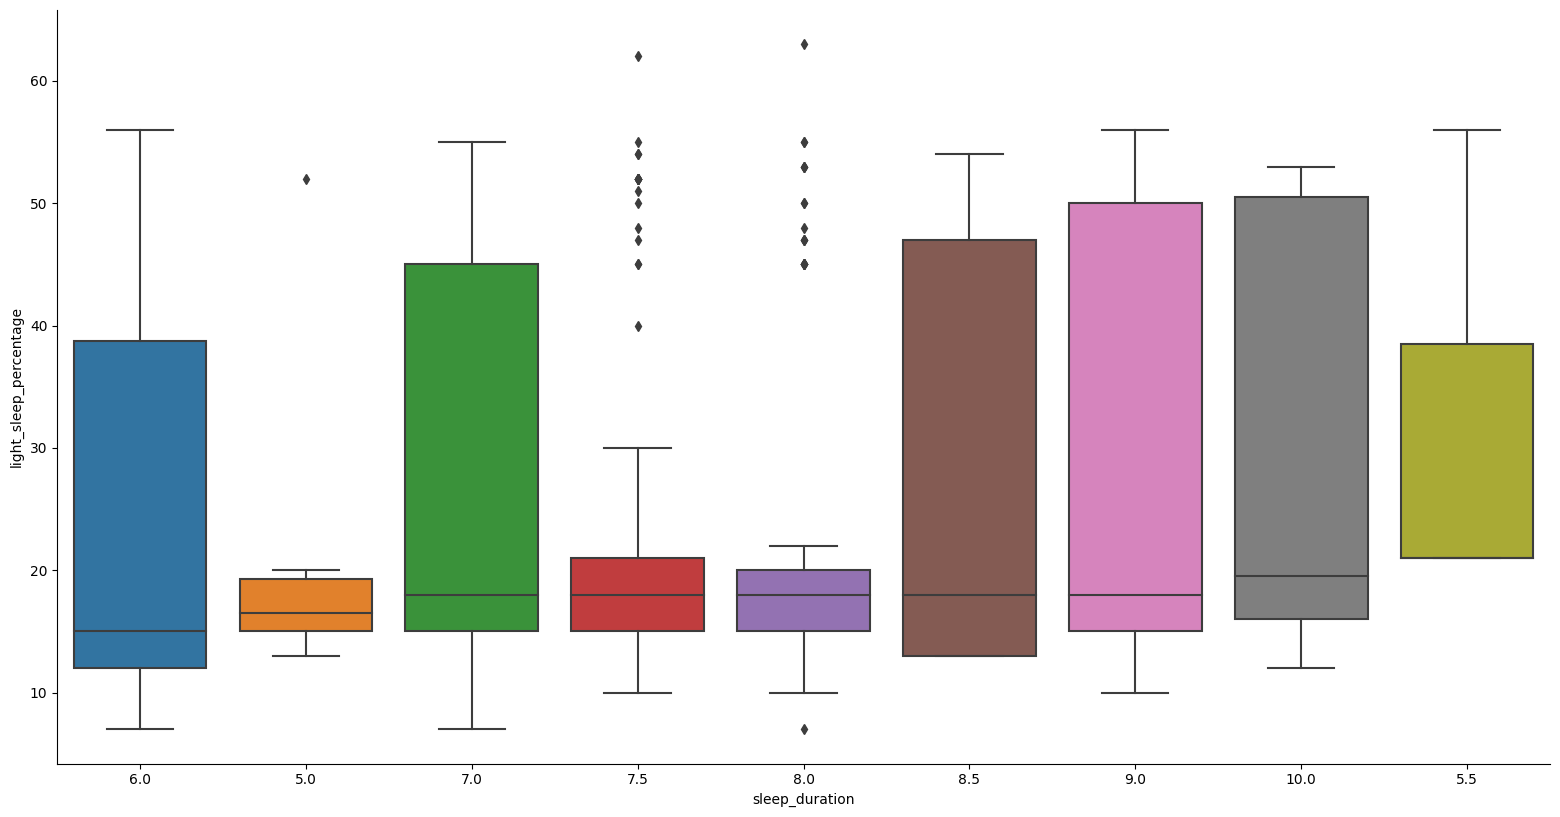

In [12]:
sleep_duration = dataset.filter(['sleep_duration', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x='sleep_duration', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('sleep_duration')[var].median().sort_values().index)

From the boxplots, we can observe that there are some relations between sleep duration and the respective sleep percentages. However, the trends are inconclusive.

### Relationship between Sleep Efficiency and Sleep Percentages

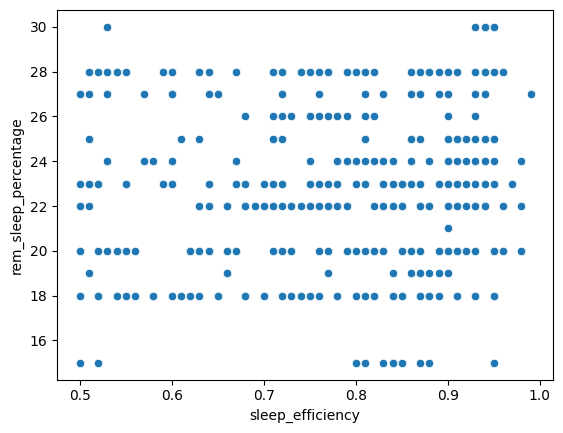

rem_sleep_percentage Correlation: 0.06236245443354682


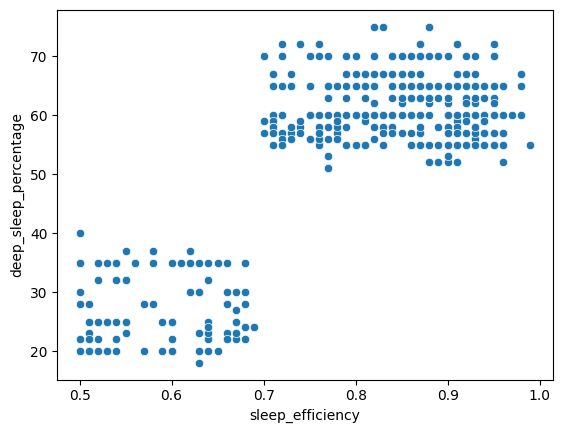

deep_sleep_percentage Correlation: 0.787335100551303


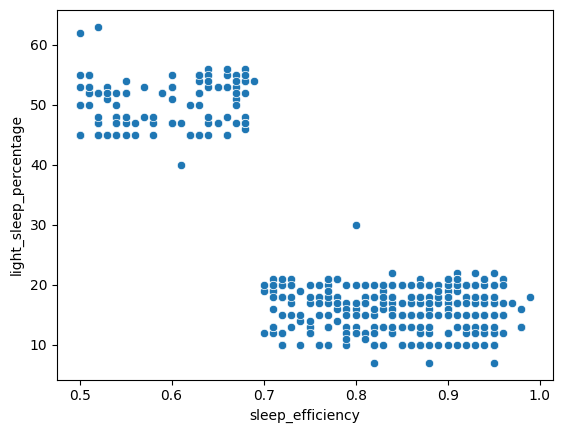

light_sleep_percentage Correlation: -0.8192040344055324


In [13]:
sleep_percentages = dataset.filter(['sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage'])

for var in sleep_percentages:
    if var != 'sleep_efficiency':
        tmp=sleep_percentages.filter(['sleep_efficiency',var])
        sb.scatterplot(data = tmp, x = 'sleep_efficiency', y=var)
        plt.show()
        print(var + " Correlation: " + str(tmp['sleep_efficiency'].corr(tmp[var])))

From the scatterplots, we can deduce the following:

1. There is no strong relation between sleep efficiency and REM sleep percentage.

2. Deep sleep percentage generally increases with sleep efficiency. (Correlation = 0.7873351005513035)

3. Light sleep percentage generally decreases with sleep efficiency. (Correlation = -0.8192040344055319)

## Sleep Quality

### Does Age affect Sleep Quality?

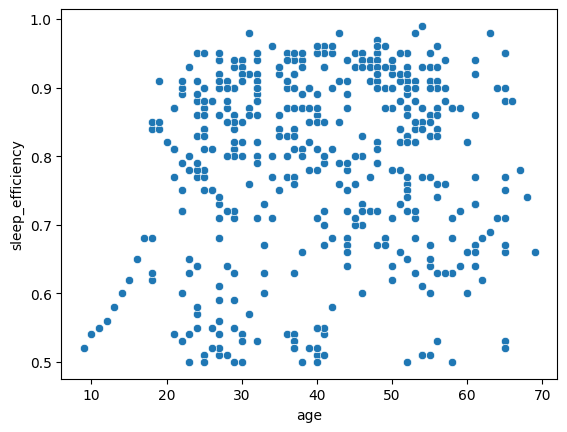

sleep_efficiency Correlation: 0.0983566902170089


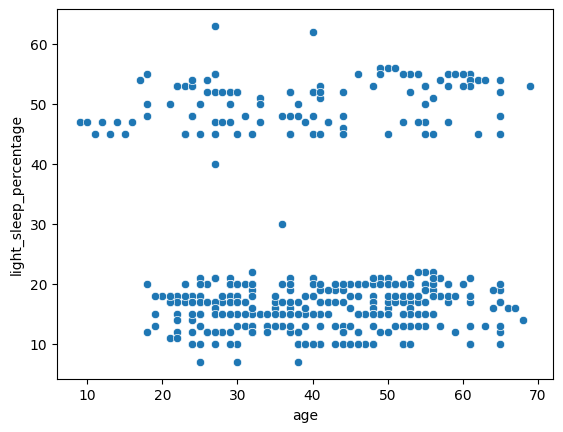

light_sleep_percentage Correlation: -0.03190474265163385


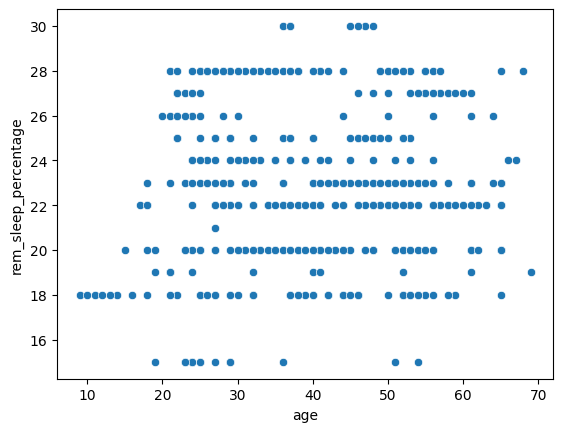

rem_sleep_percentage Correlation: 0.04209074306763441


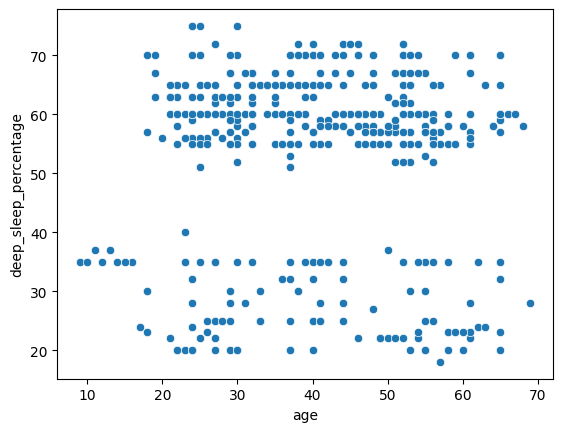

deep_sleep_percentage Correlation: 0.021730104861789824


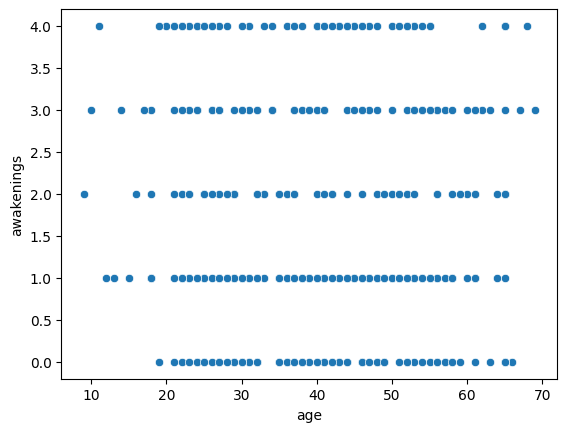

awakenings Correlation: -0.017788580495976272


In [14]:
age = dataset.filter(['age', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in age:
    if var != 'age':
        tmp=age.filter(['age',var])
        sb.scatterplot(data = tmp, x = 'age', y=var)
        plt.show()
        print(var + " Correlation: " + str(tmp['age'].corr(tmp[var])))

From the scatterplots, we can deduce that age does no relationship between age and the factors.

### Does Gender affect Sleep Quality?

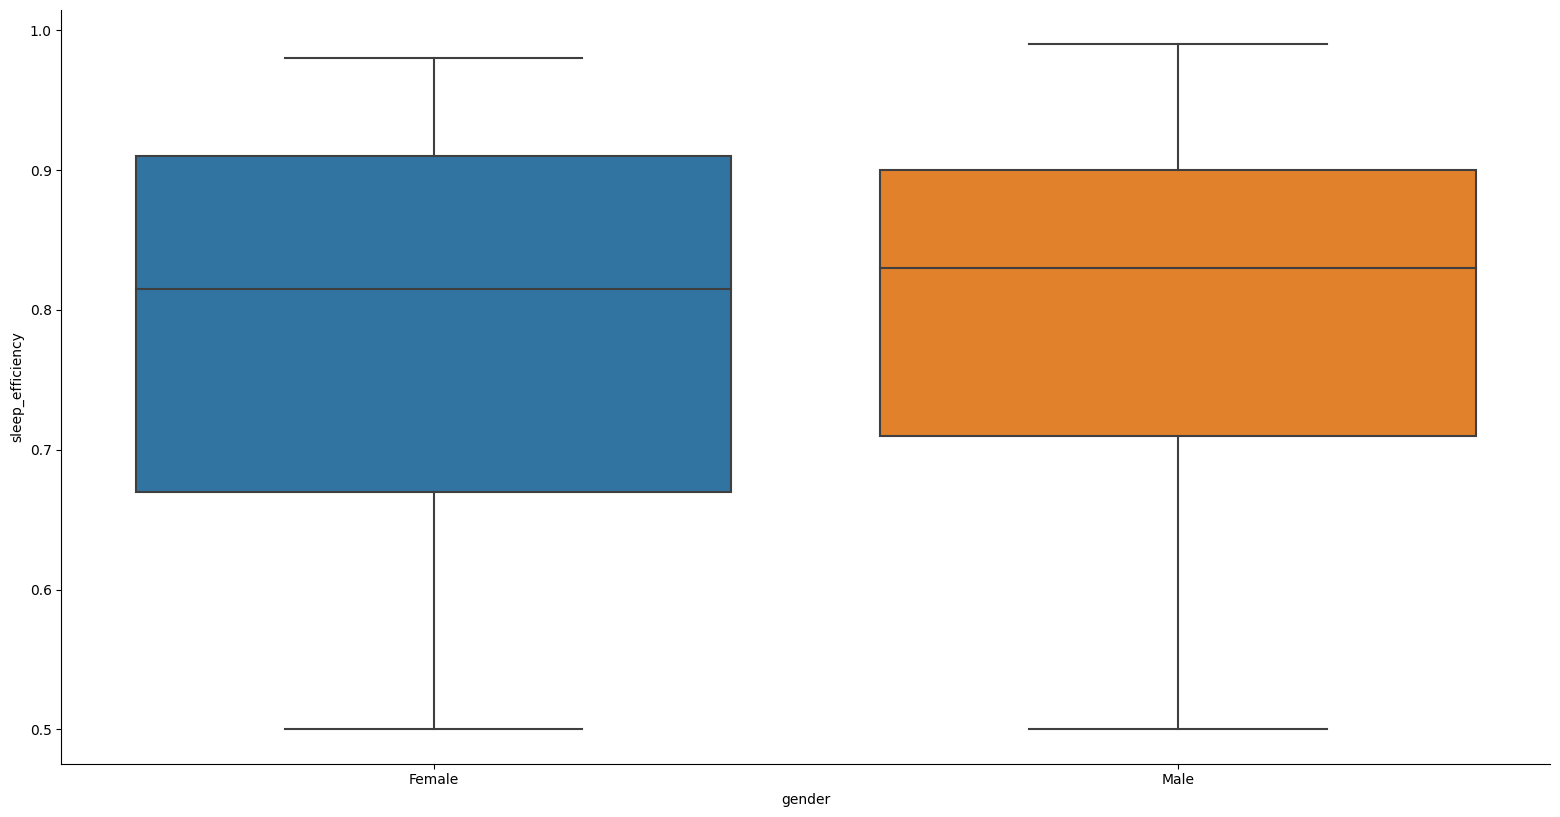

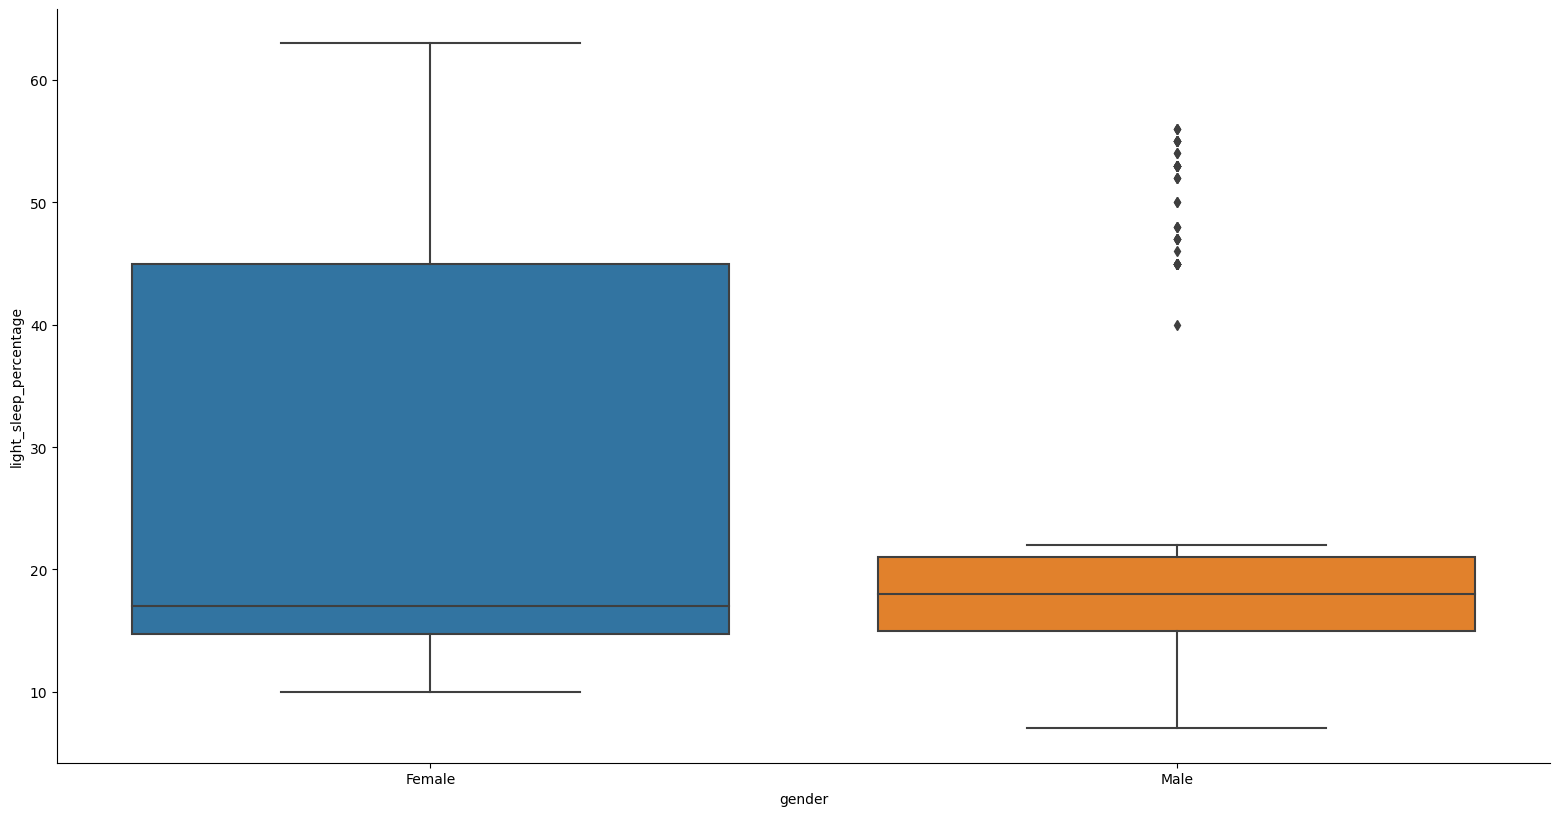

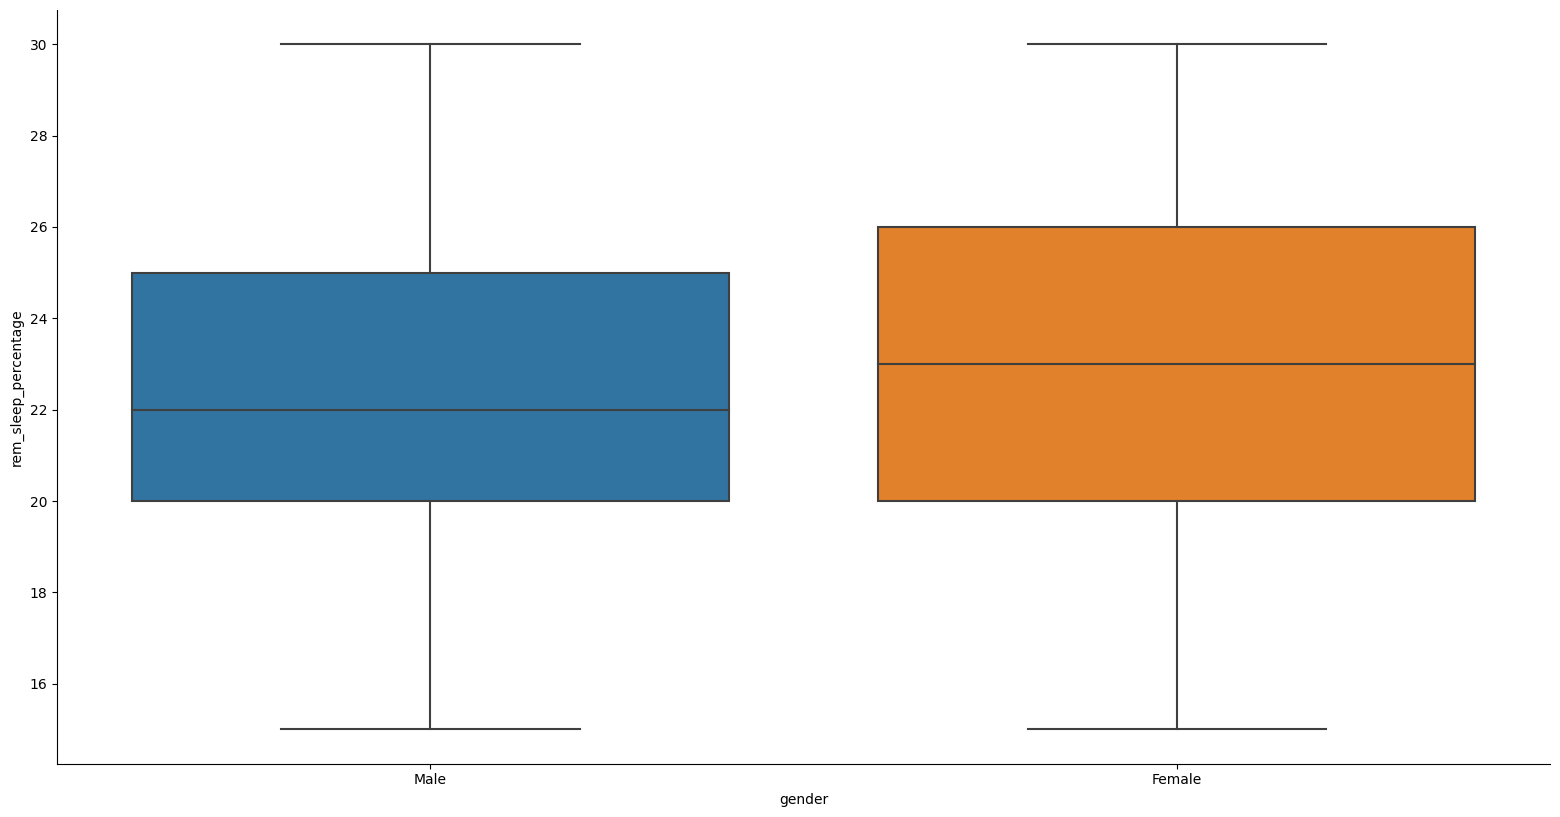

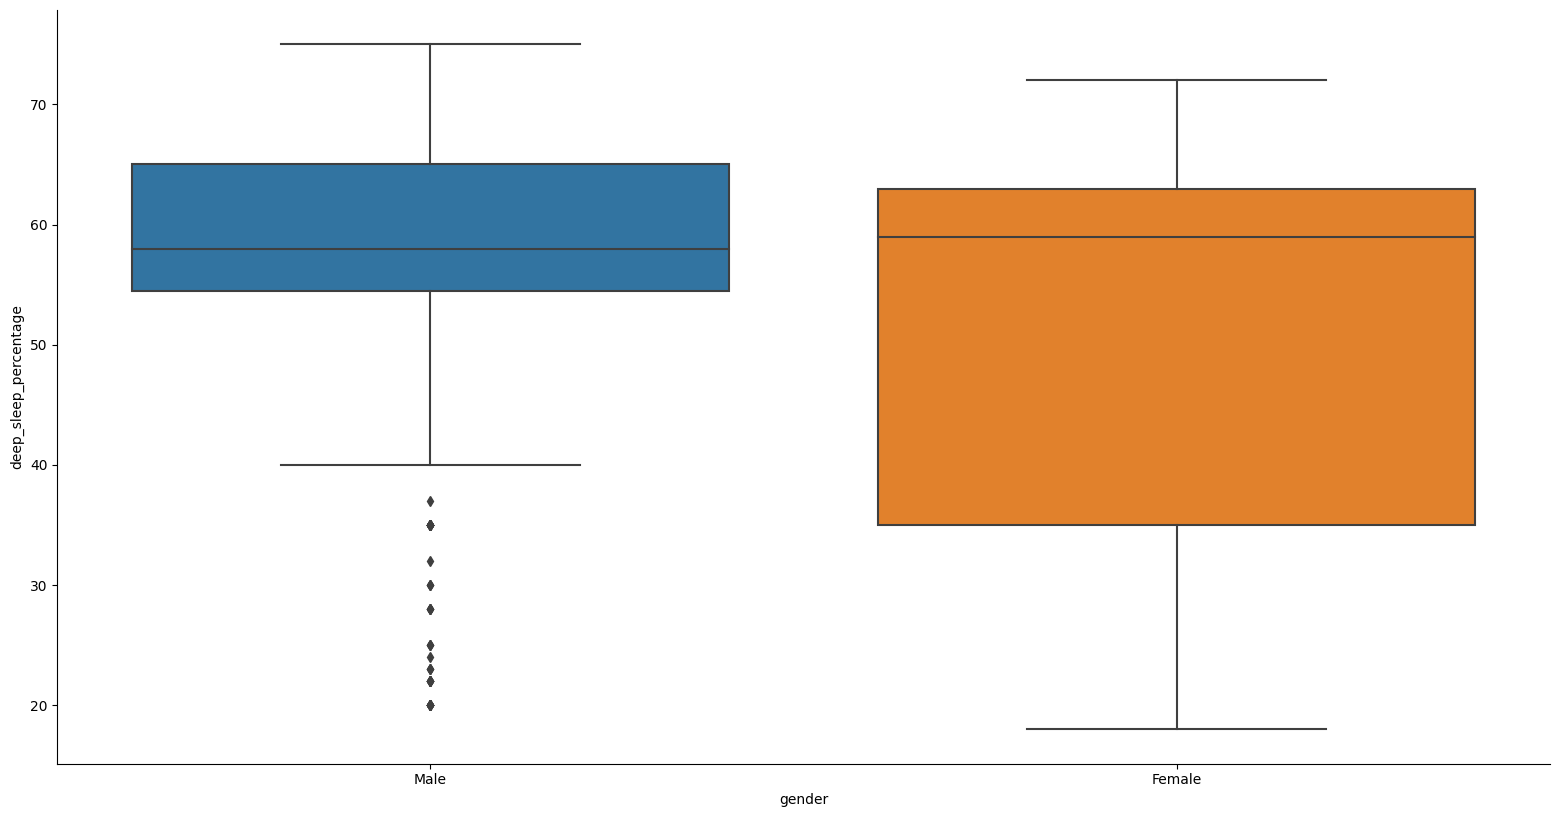

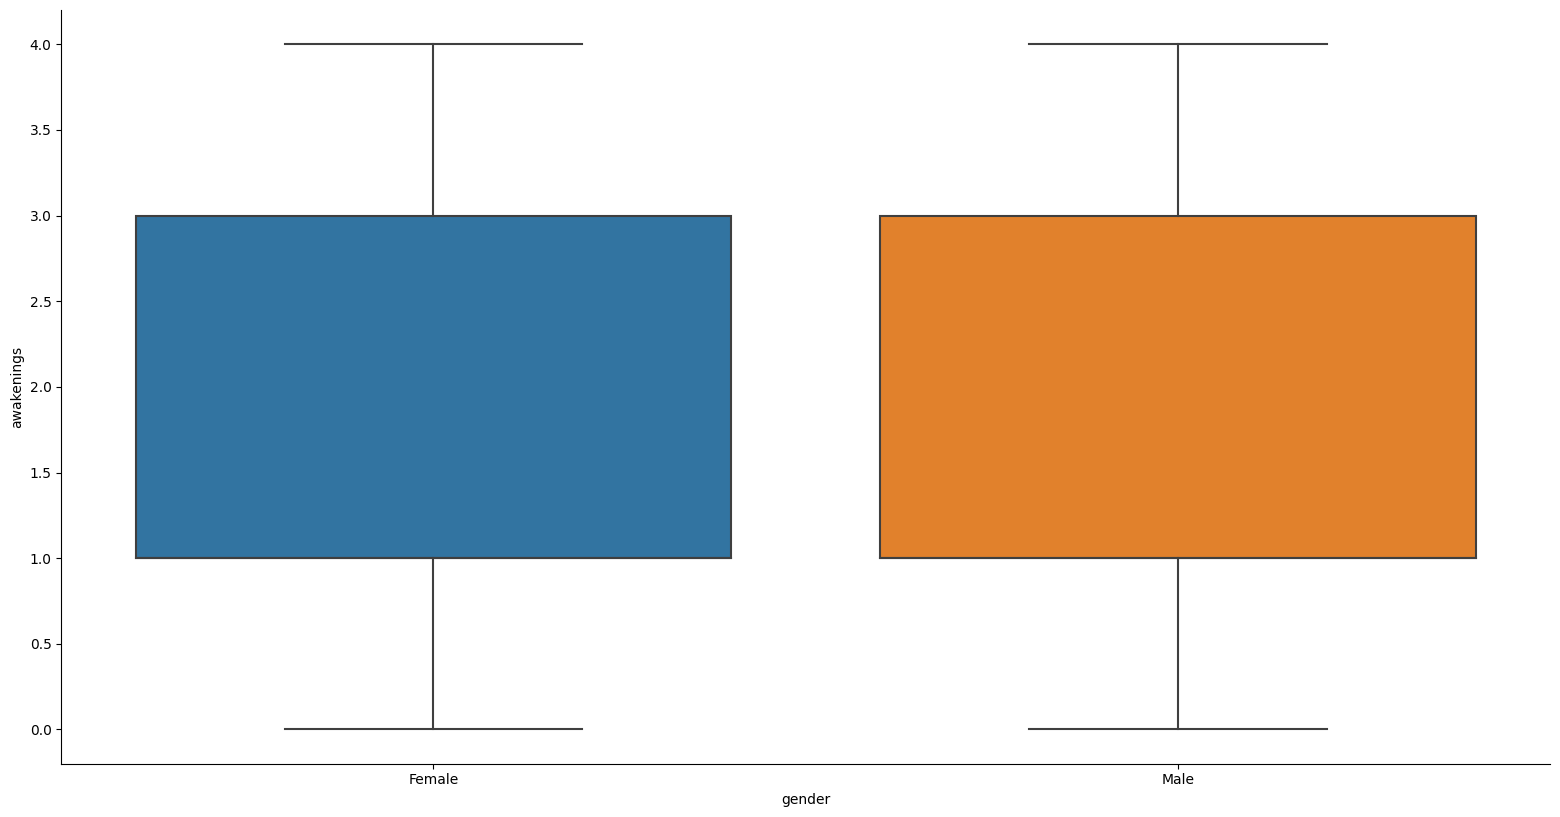

In [15]:
gender = dataset.filter(['gender', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in gender:
    if var != 'gender':
        tmp=gender.filter(['gender',var])
        sb.catplot(data=tmp, x='gender', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('gender')[var].median().sort_values().index)

From the box plots, there is no strong relationship between gender and the factors.

### Does Bed Time affect Sleep Quality?

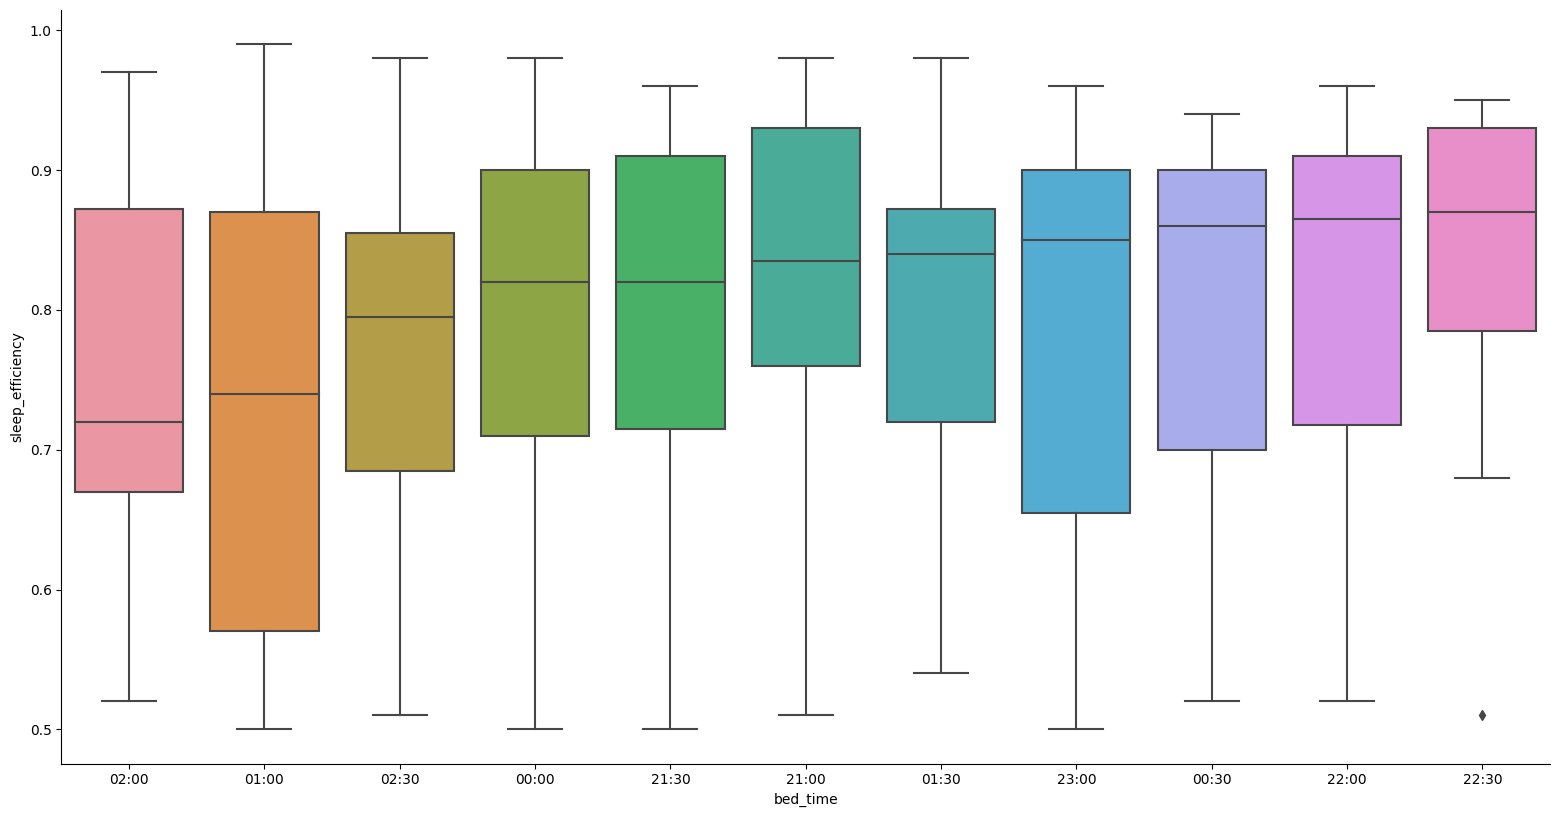

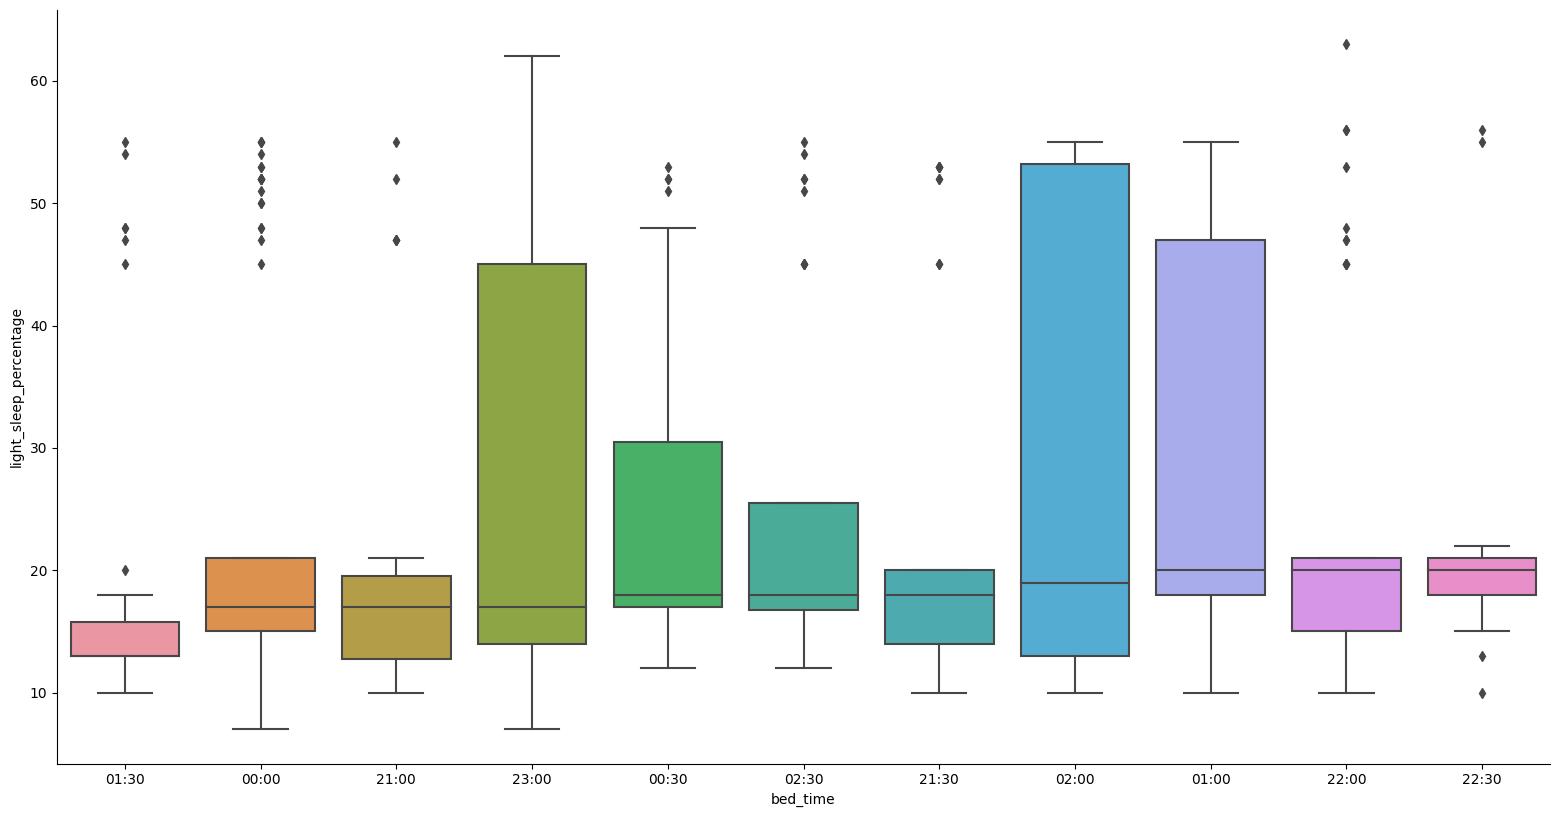

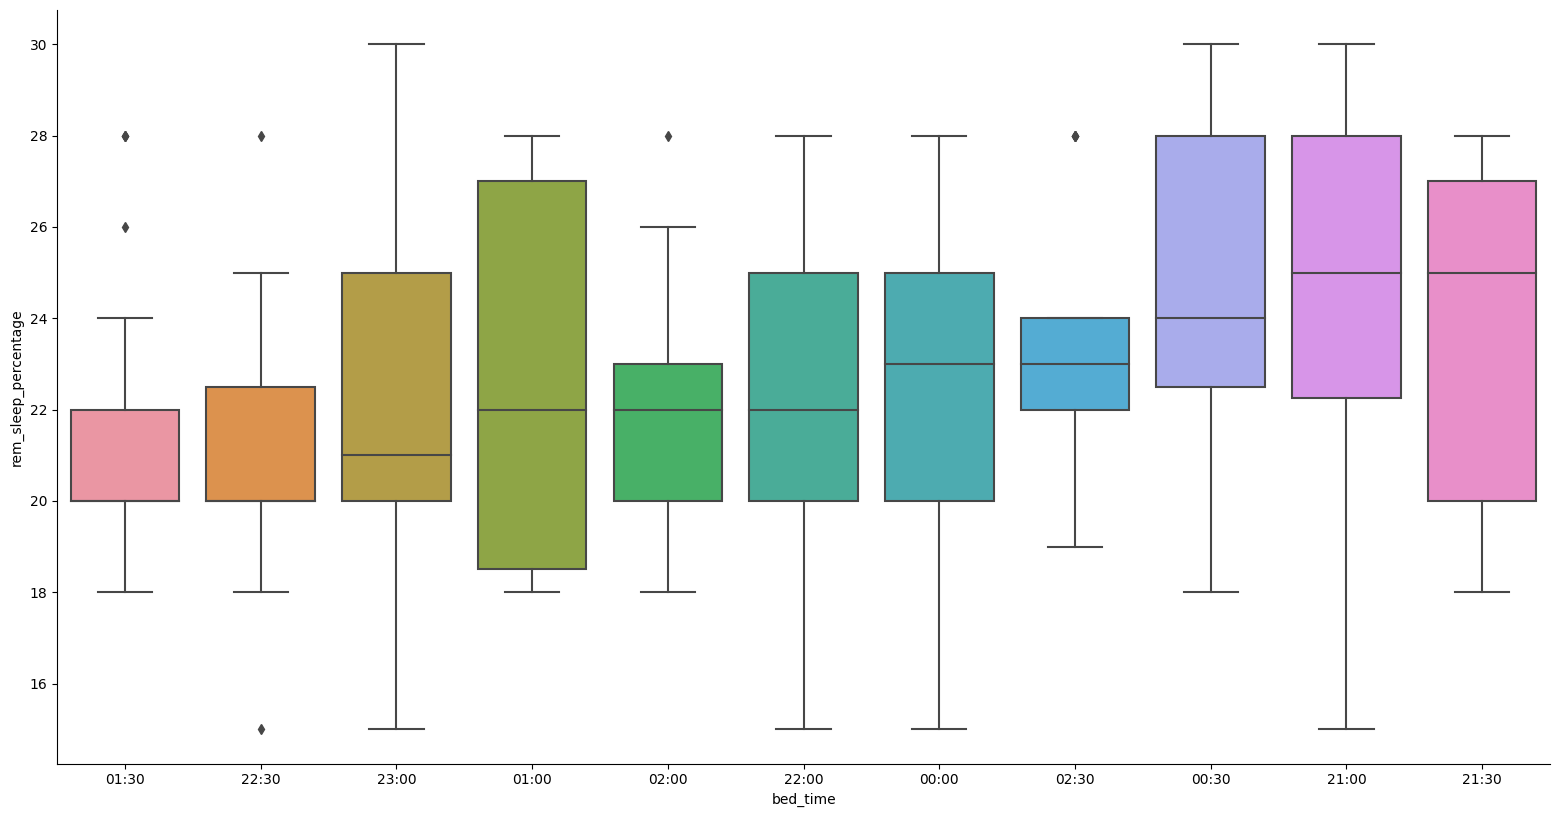

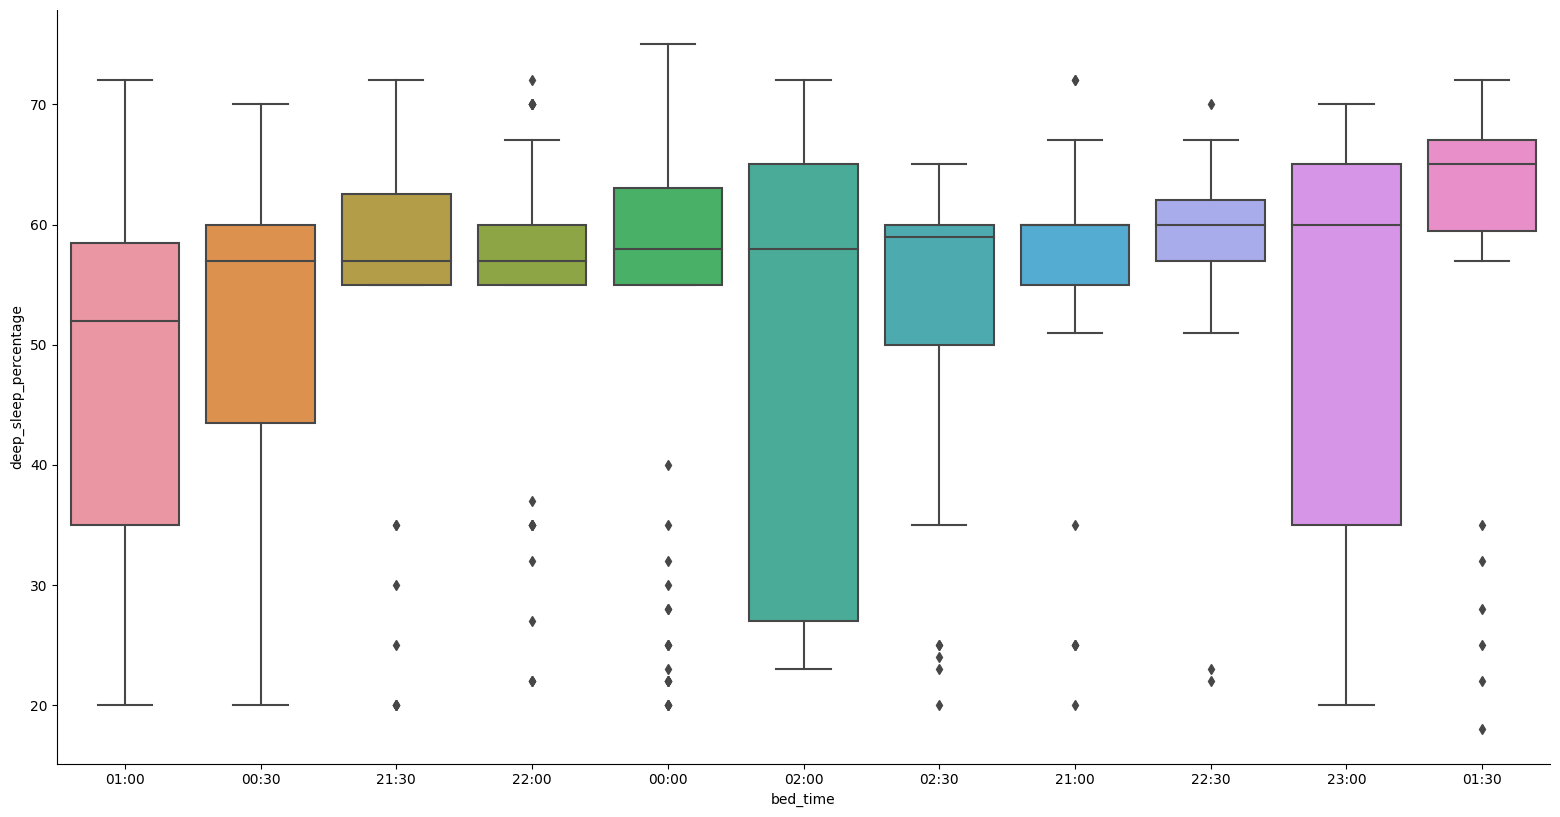

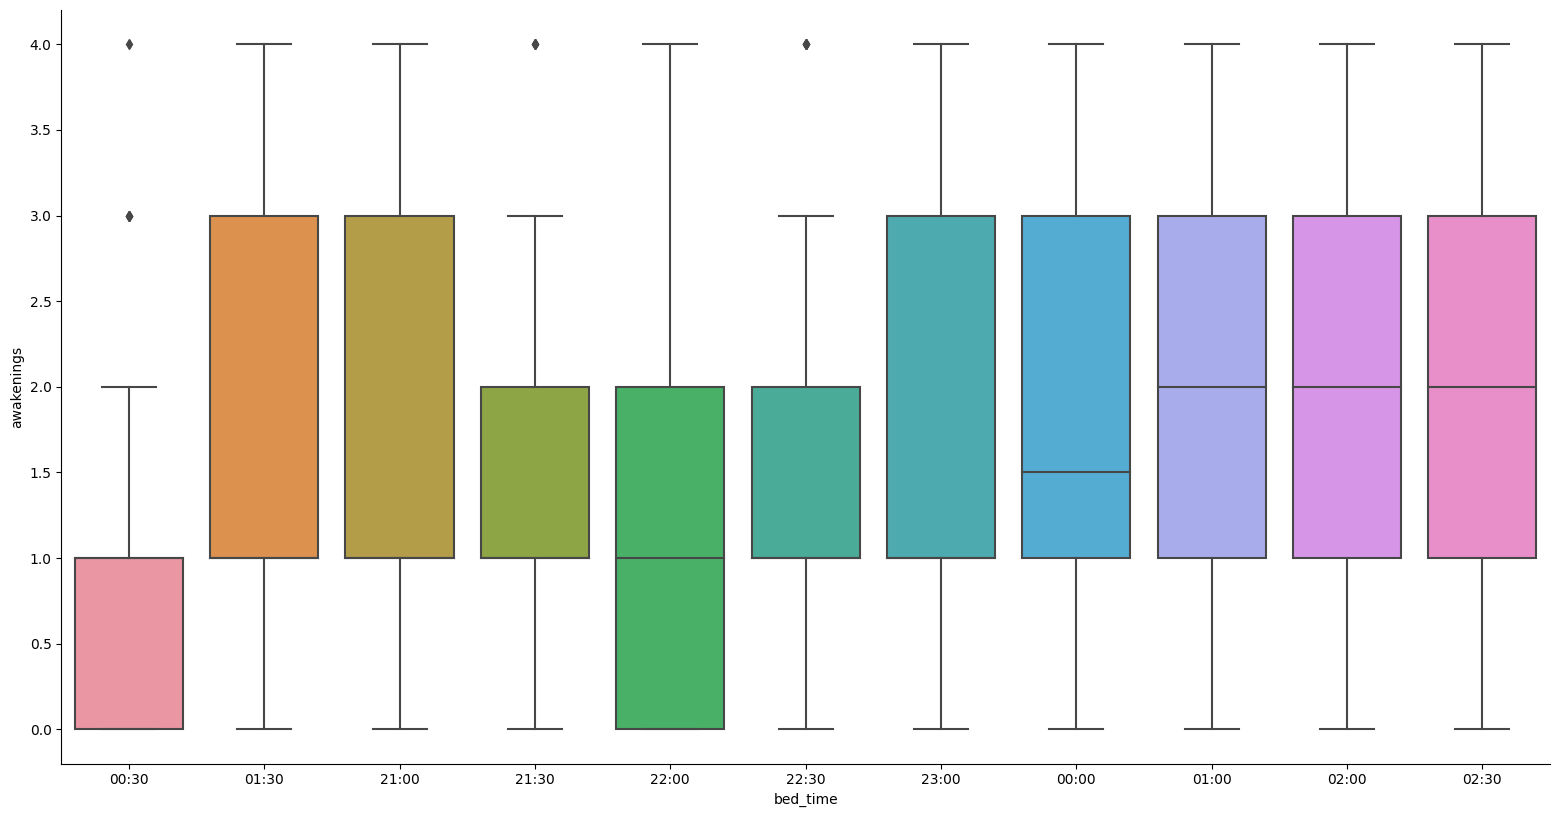

In [16]:
bedtime = dataset.filter(['bed_time', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in bedtime:
    if var != 'bed_time':
        tmp=bedtime.filter(['bed_time',var])
        sb.catplot(data=tmp, x='bed_time', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('bed_time')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency is maximised if a person goes to bed at around 10-11pm.

2. Deep sleep percentage is maximised at around 10:30-11pm with 1:30am being an exception

3. There is no strong relation between the bed time and number of awakenings.

Overall, bed time is an important factor that affects sleep quality. From the analysis, the ideal time to go to bed to maximise sleep quality is somewhere between 10-11pm.

### Does Wakeup Time affect Sleep Quality?

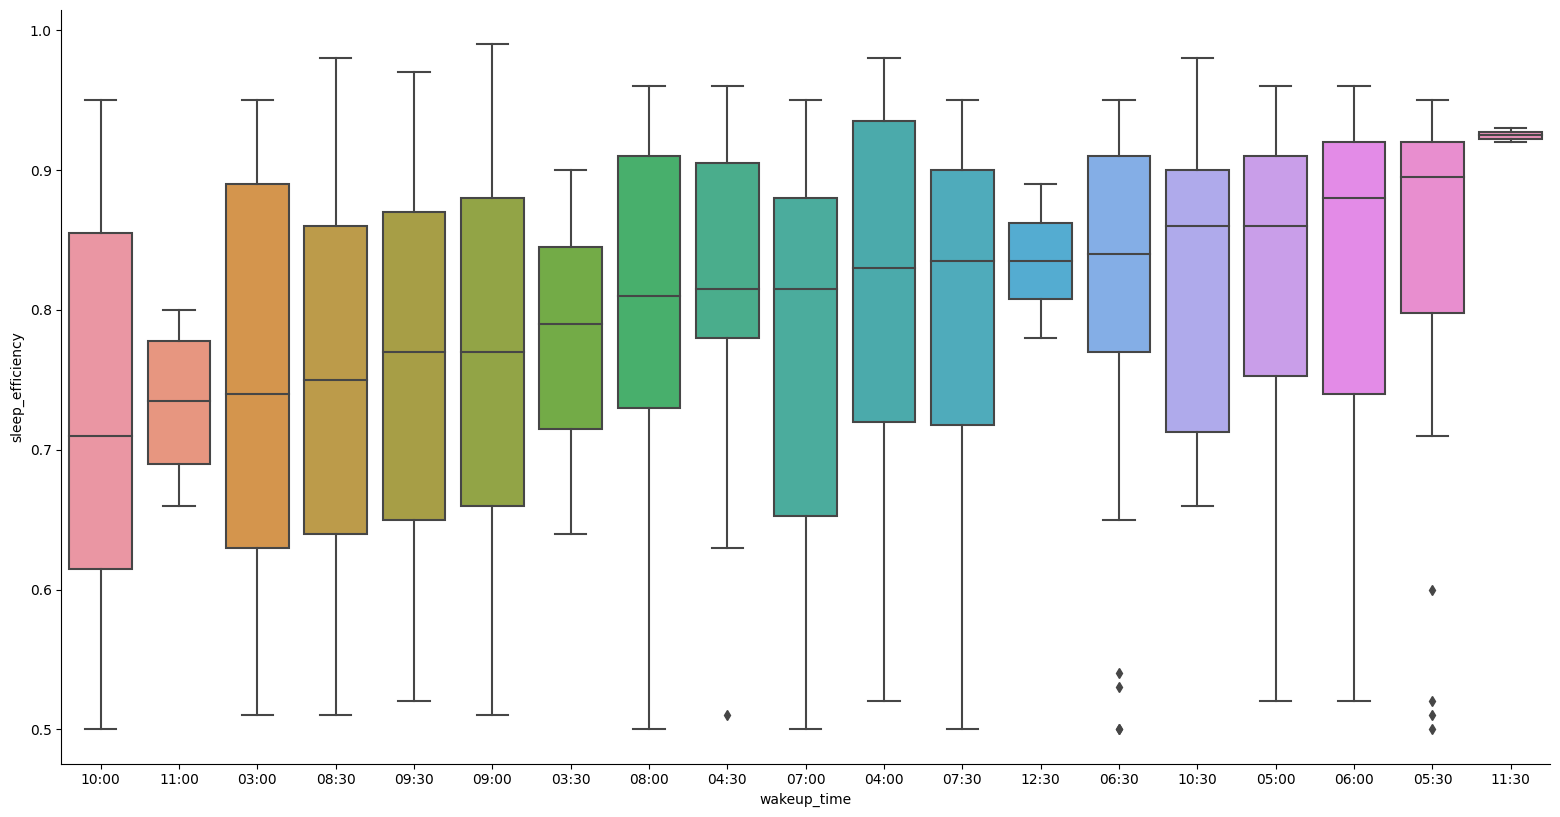

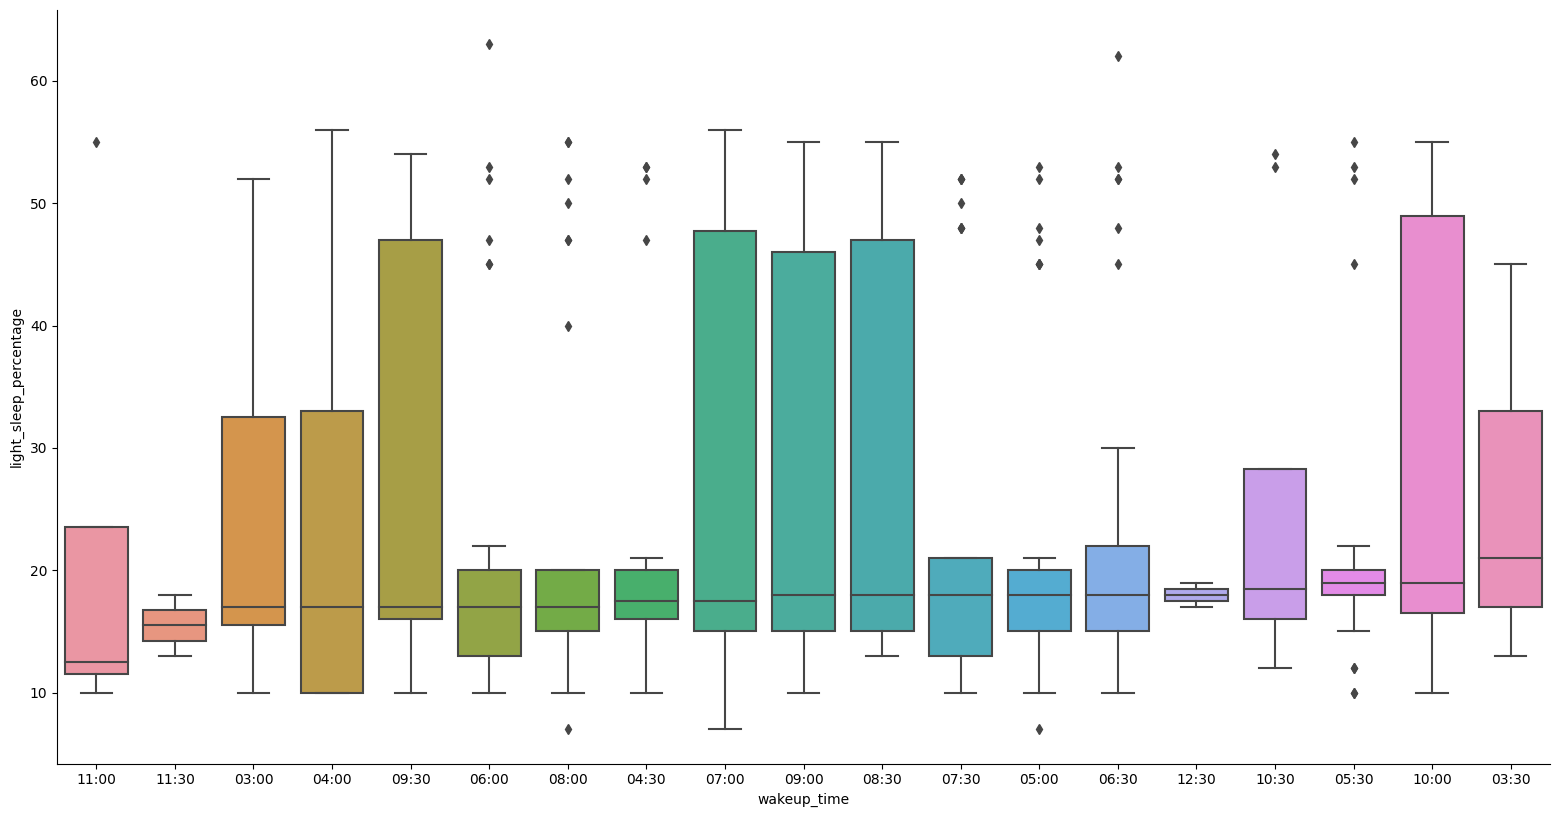

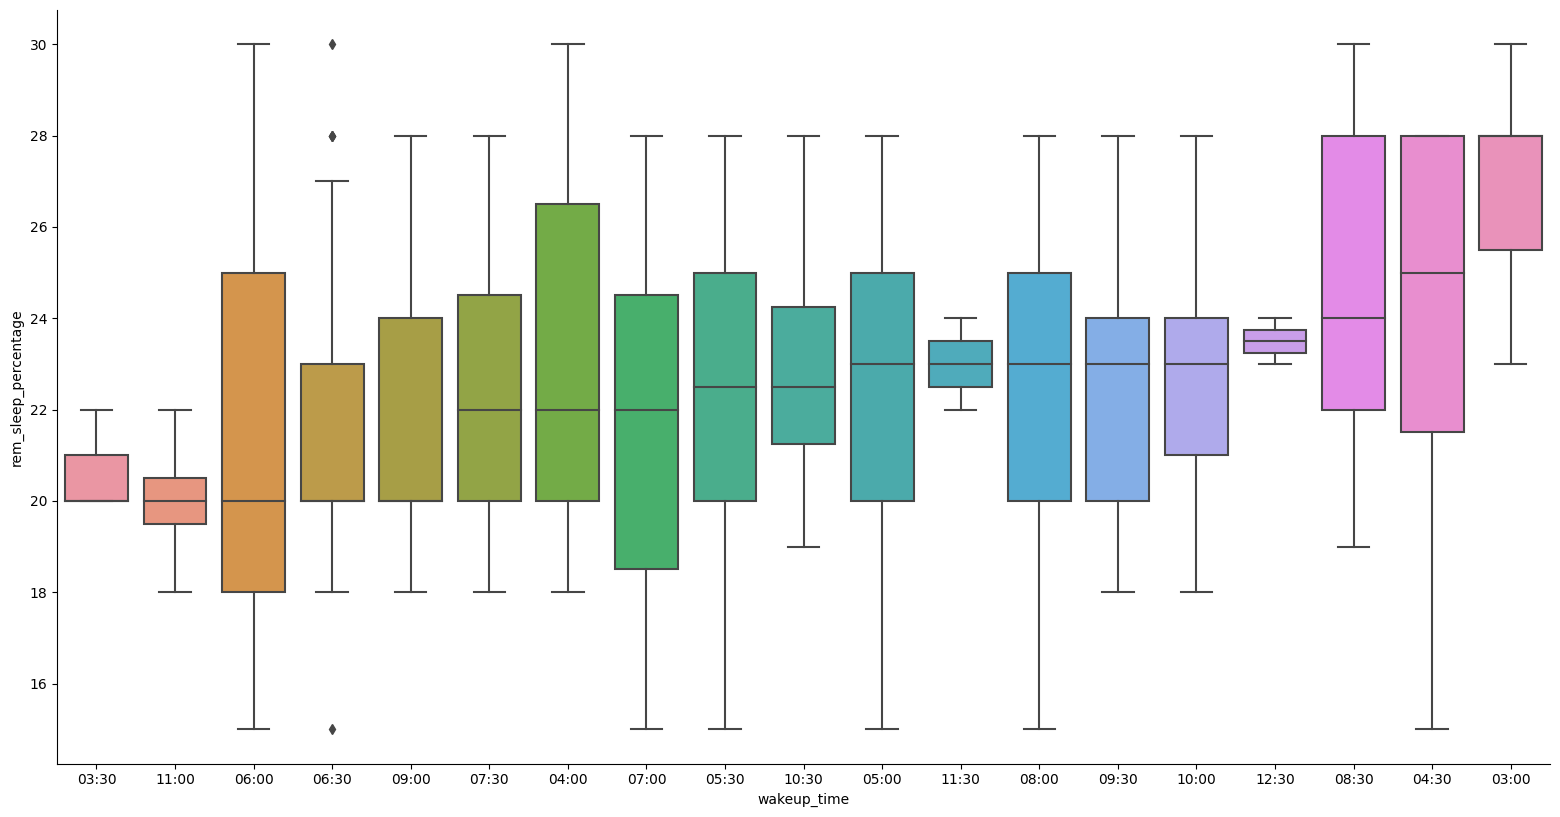

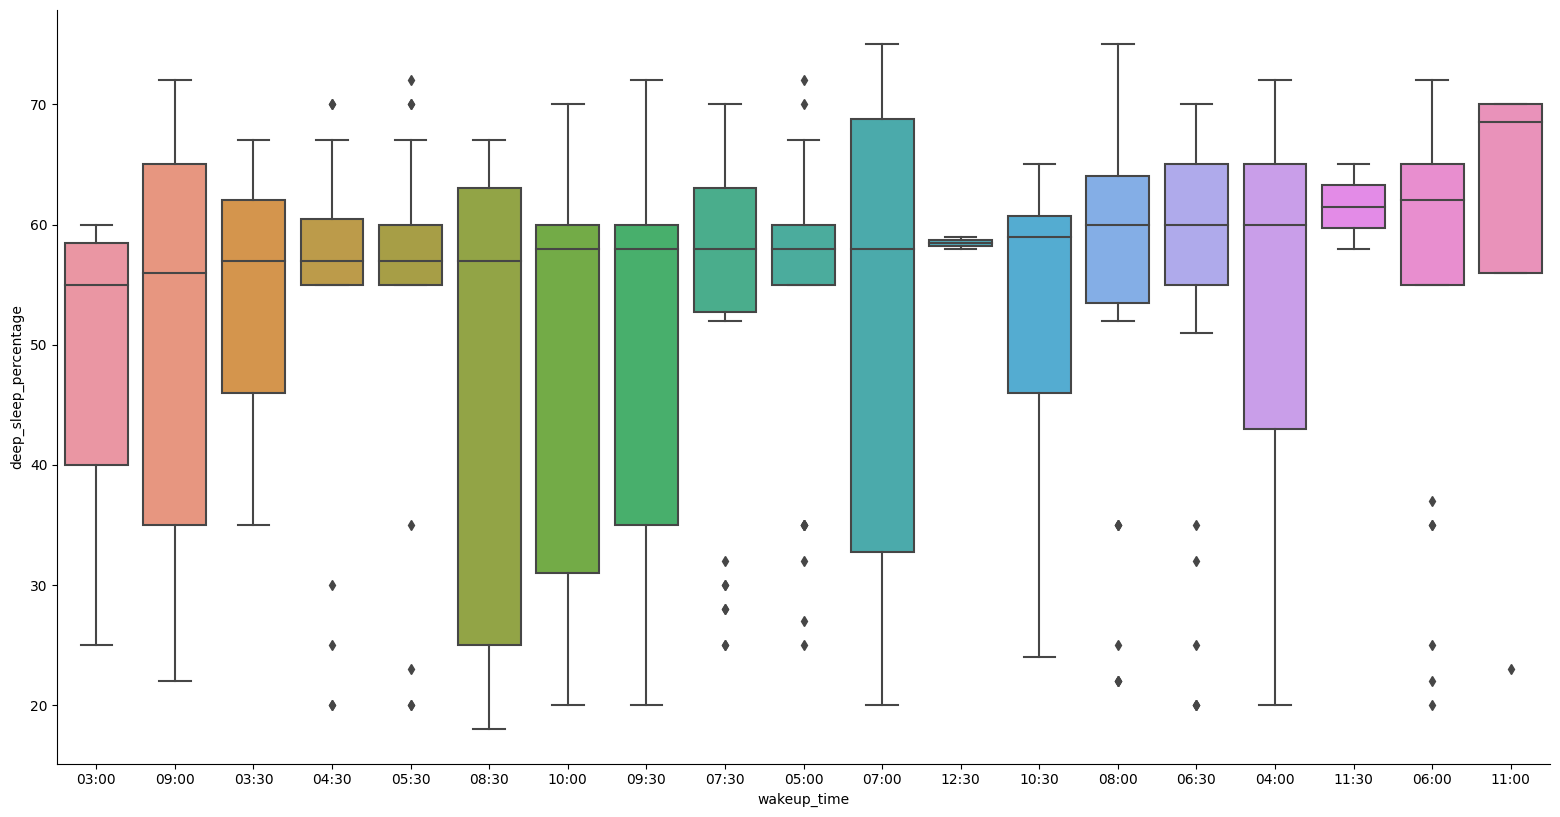

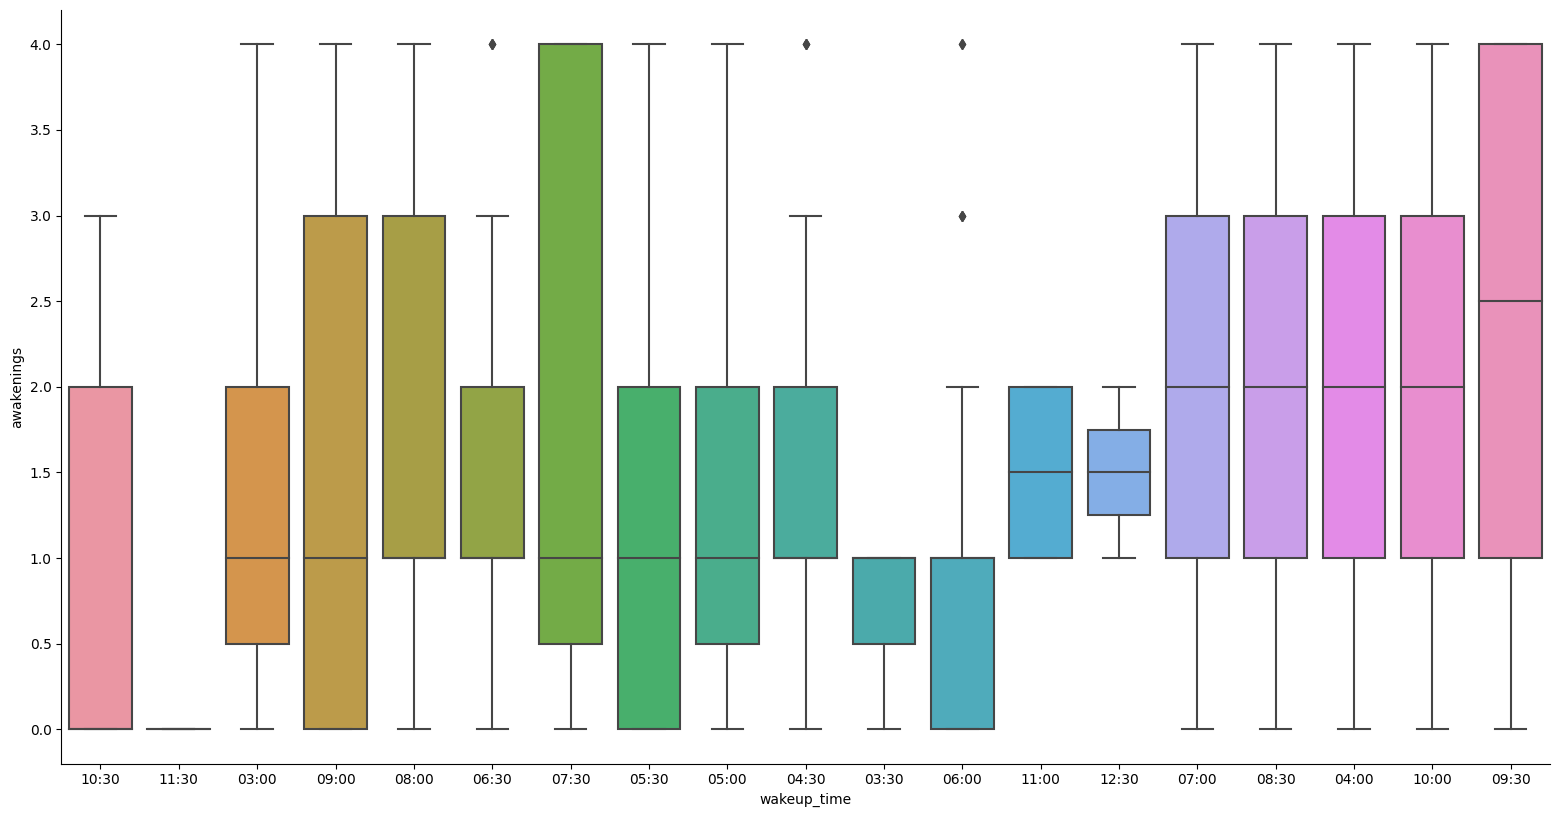

In [23]:
wakeup_time = dataset.filter(['wakeup_time', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in wakeup_time:
    if var != 'wakeup_time':
        tmp=wakeup_time.filter(['wakeup_time',var])
        sb.catplot(data=tmp, x='wakeup_time', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('wakeup_time')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency generally increases stably when wakeup time is later.

2. Deep sleep percentage generally increases as wakeup time increases, but the amount increases is not significant.

3. Generally, the number of awakenings increases with later wakeup time, but similarly, changes is not significant as it is only maximum of 2 more times.

Overall, wakeup time is an important factor that affects sleep quality. From the analysis, the ideal time to go to bed to maximise sleep quality is somewhere between 5-7am.

### Does Sleep Duration affect Sleep Quality?

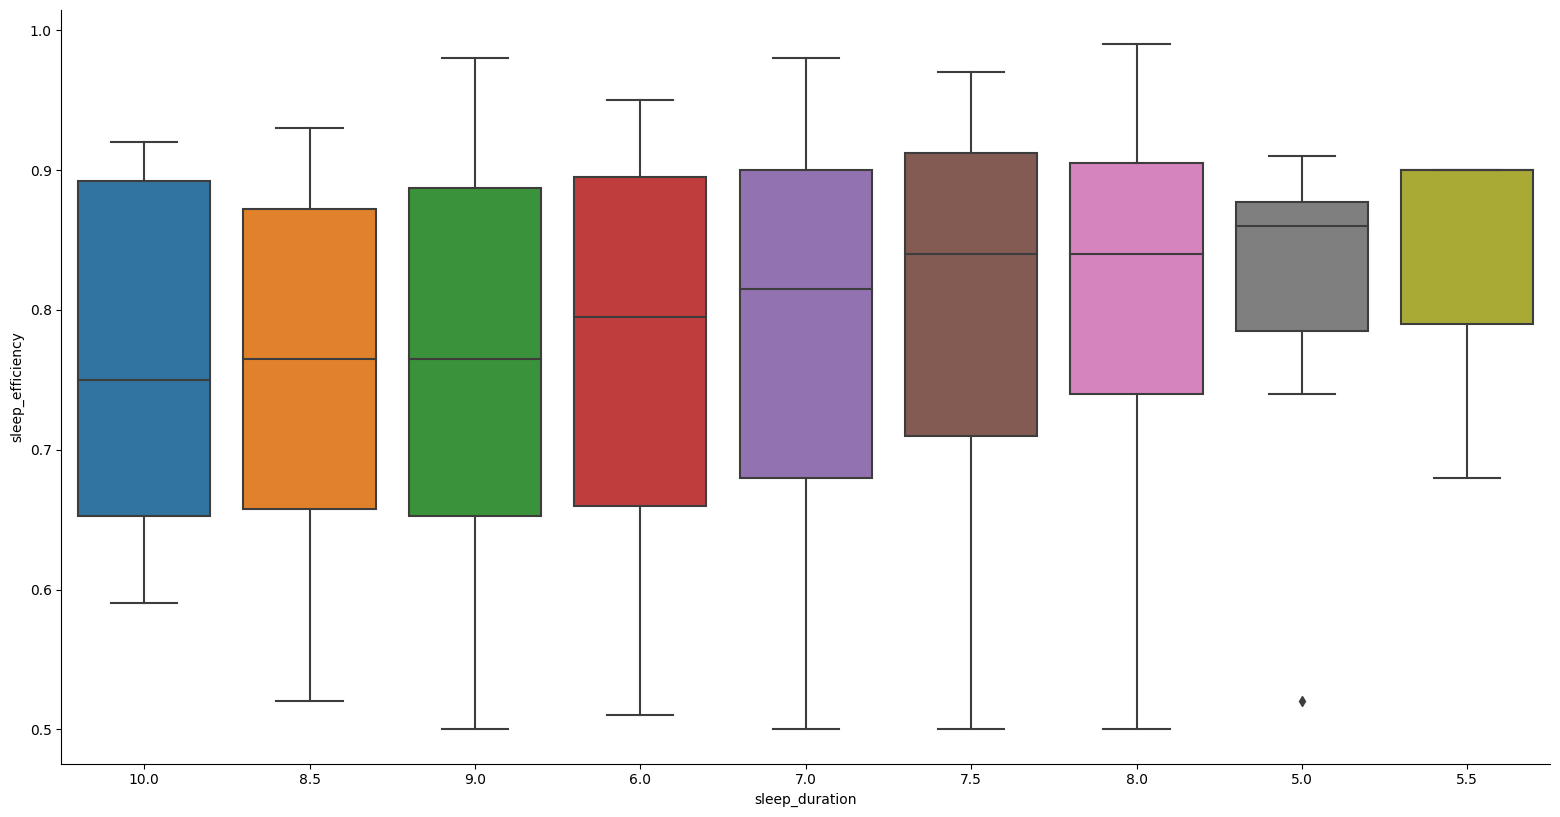

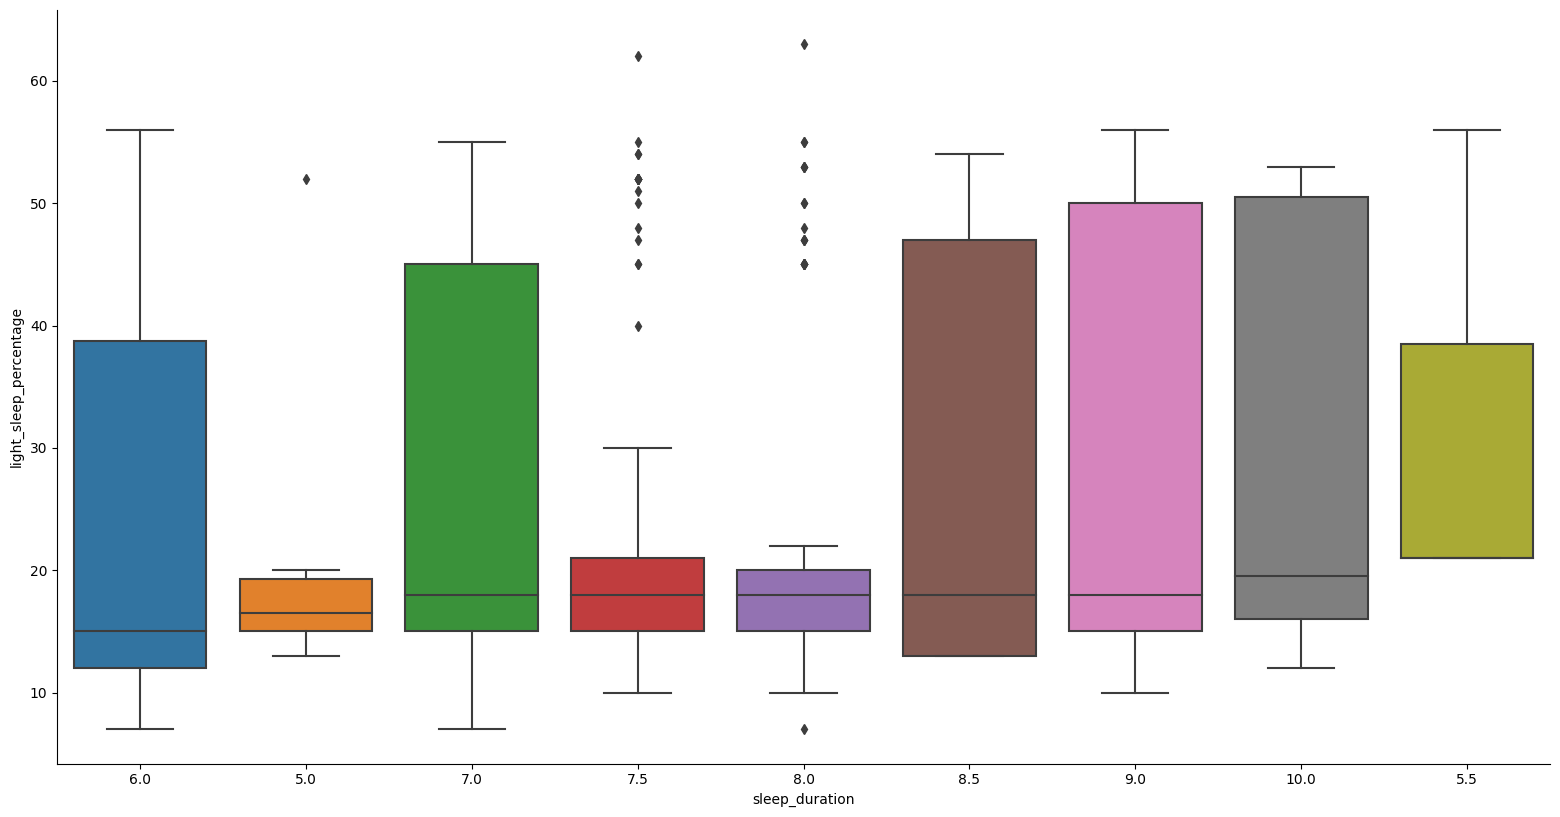

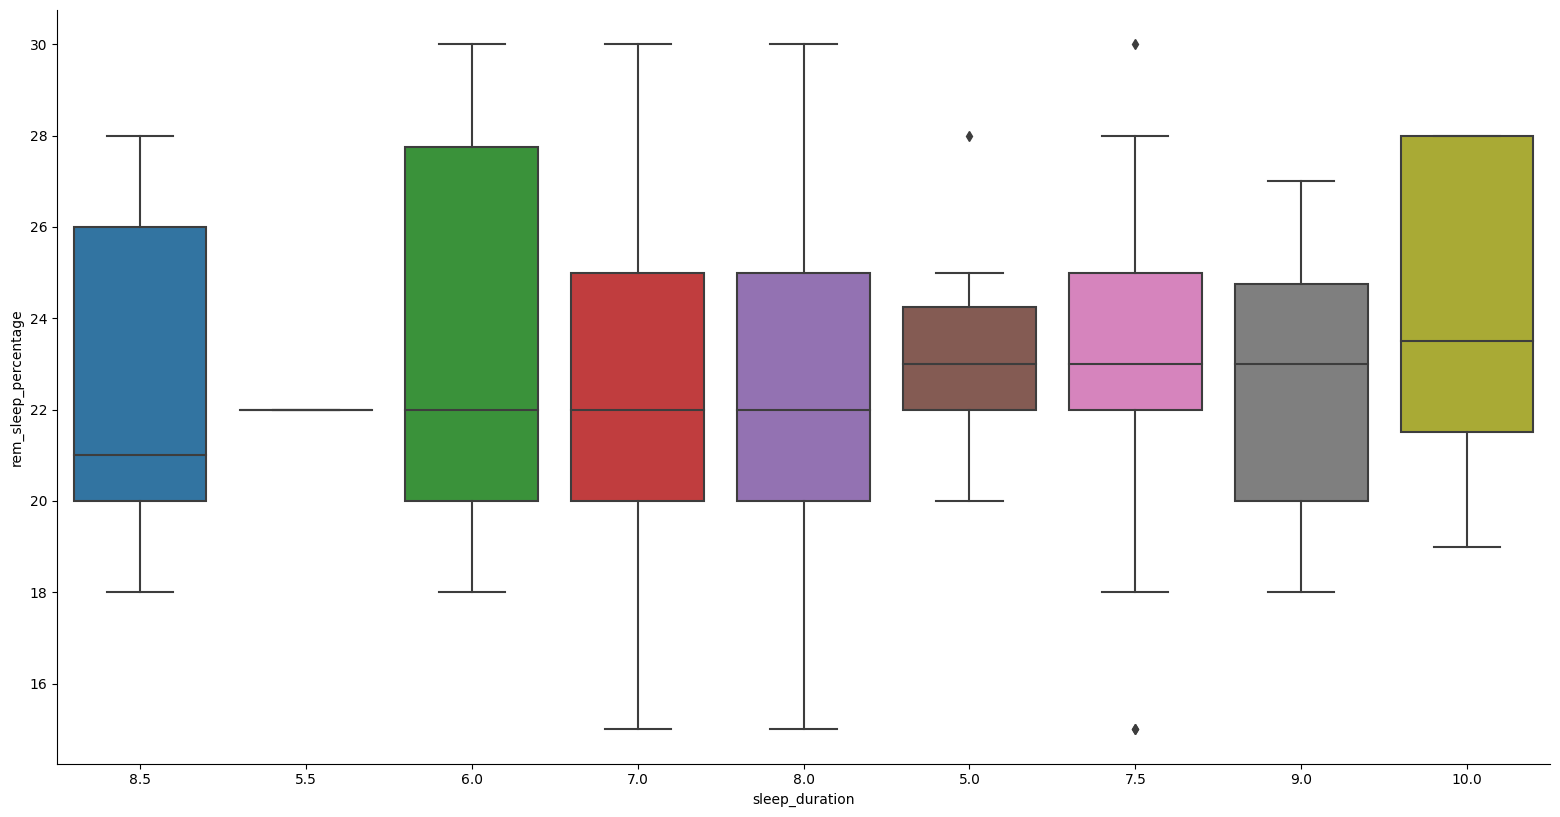

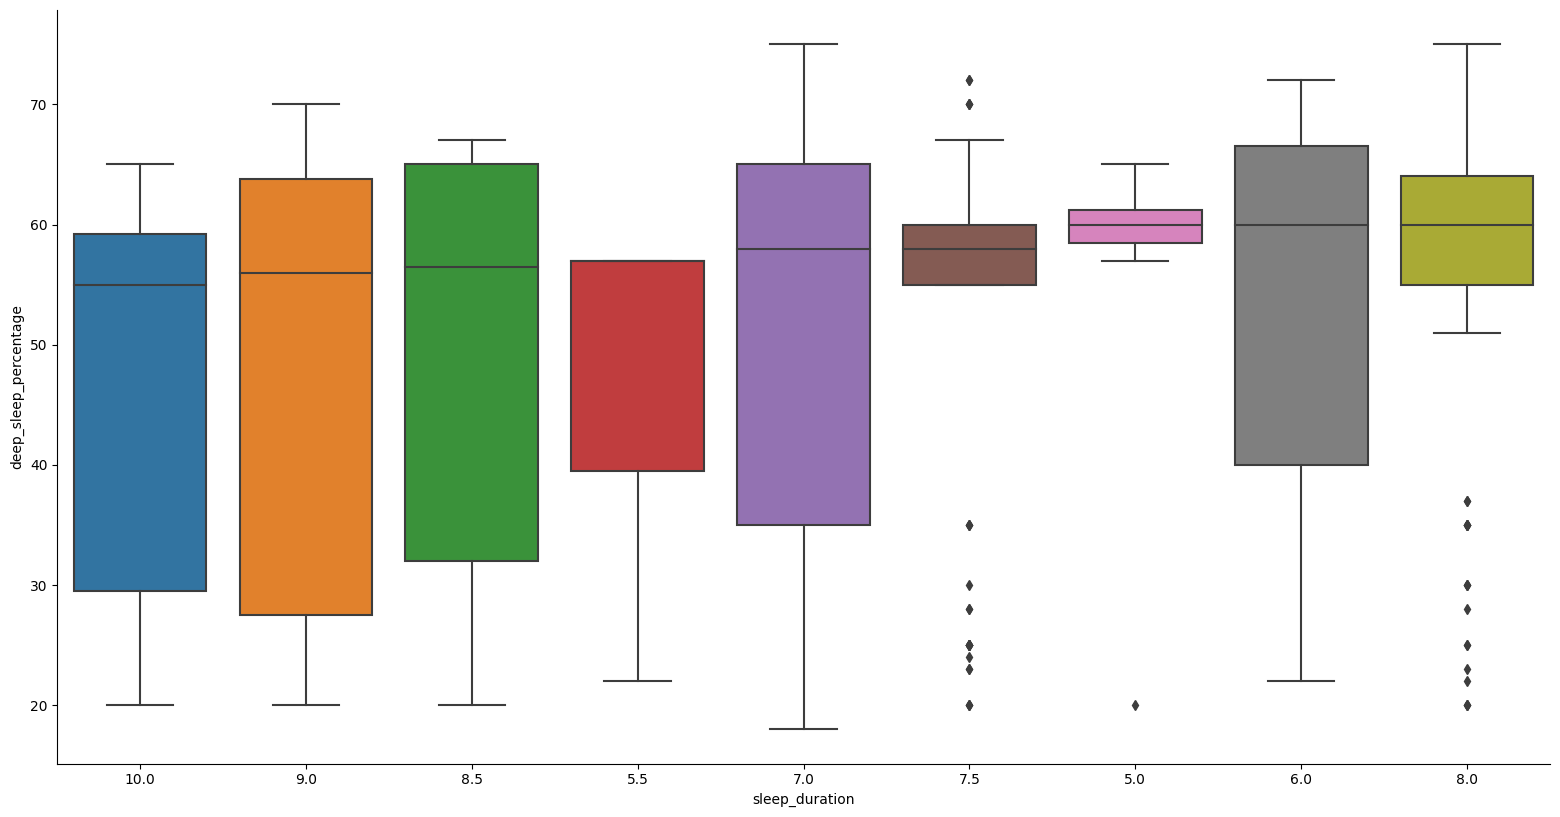

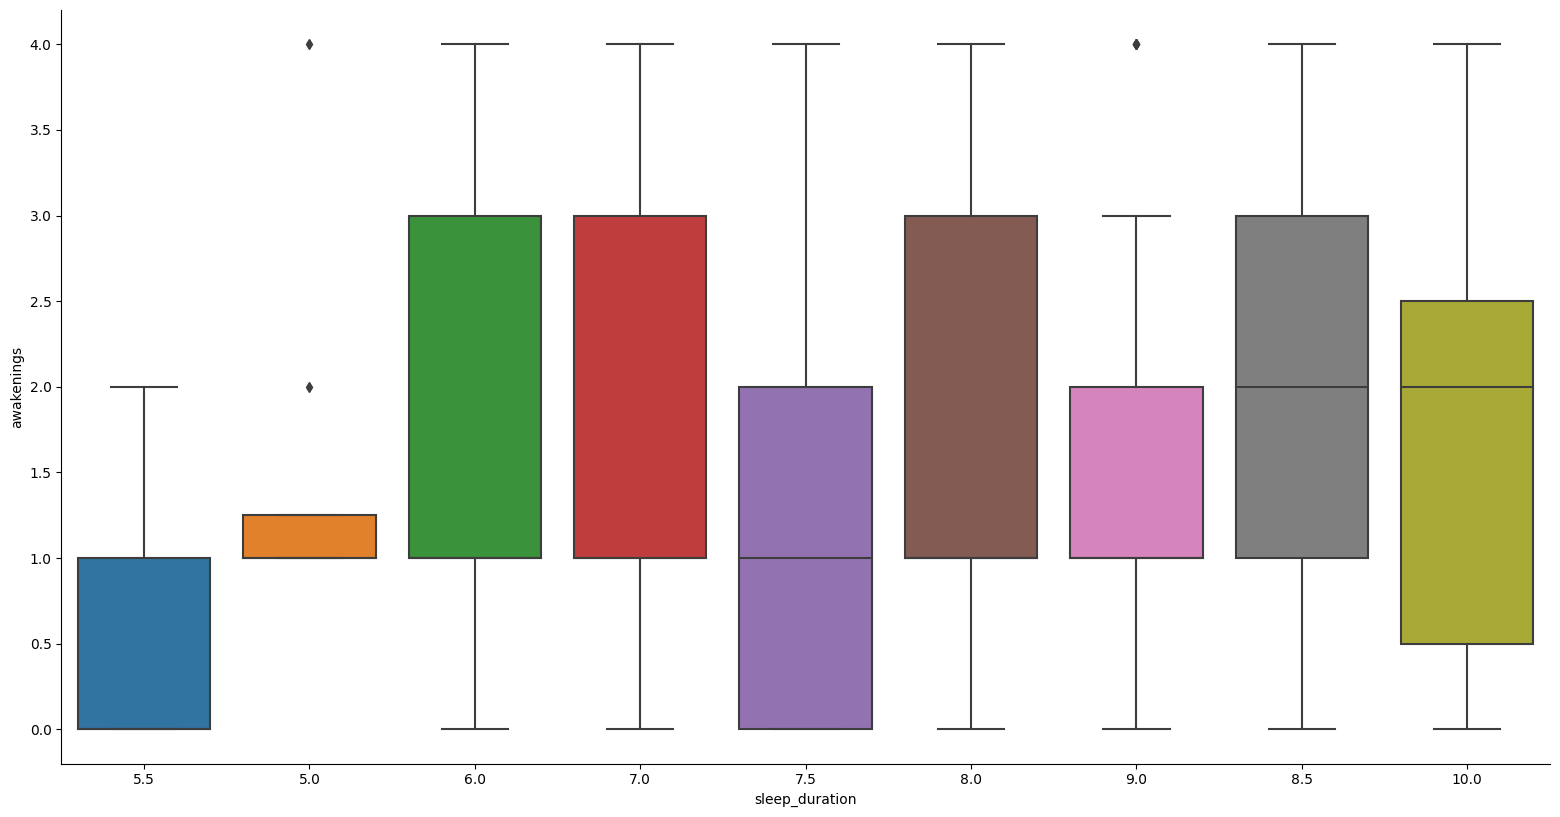

In [18]:
sleep_duration = dataset.filter(['sleep_duration', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in sleep_duration:
    if var != 'sleep_duration':
        tmp=sleep_duration.filter(['sleep_duration',var])
        sb.catplot(data=tmp, x='sleep_duration', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('sleep_duration')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency generally increases with when sleep duration decreases.

2. Deep sleep percentage is maximised around 6-8 hours of sleep, whereas too much sleep(10 hours) causes deep sleep percentage to be minimal.

3. Generally, the number of awakenings increases with longer sleep duration.

Overall, sleep duration is an important factor that affects sleep quality. According to the analysis, sleeping around 6-8 hours will maximise sleep quality.

### Does Exercise Frequency affect Sleep Quality?

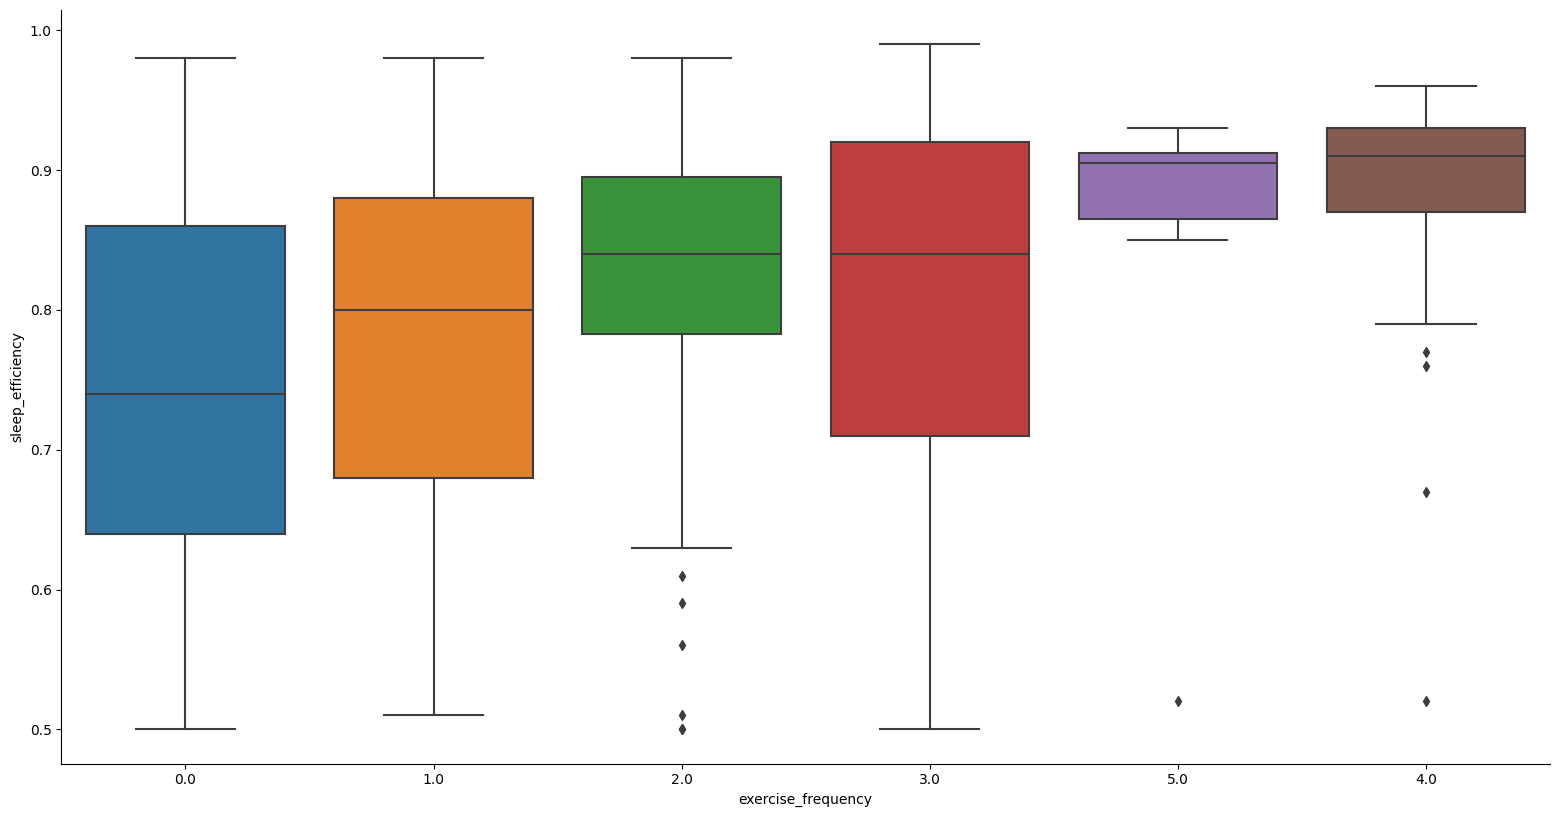

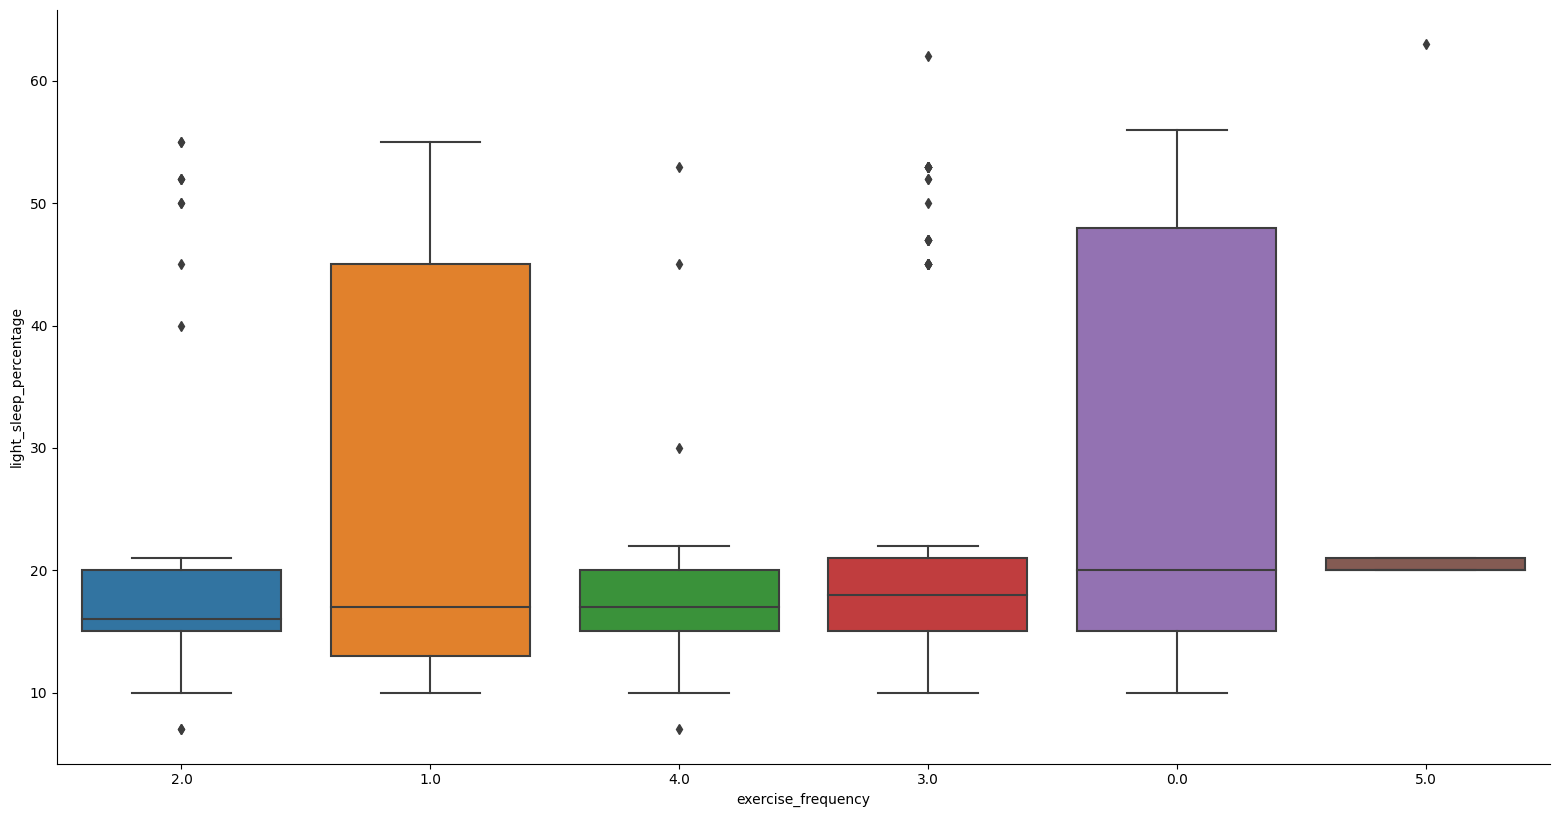

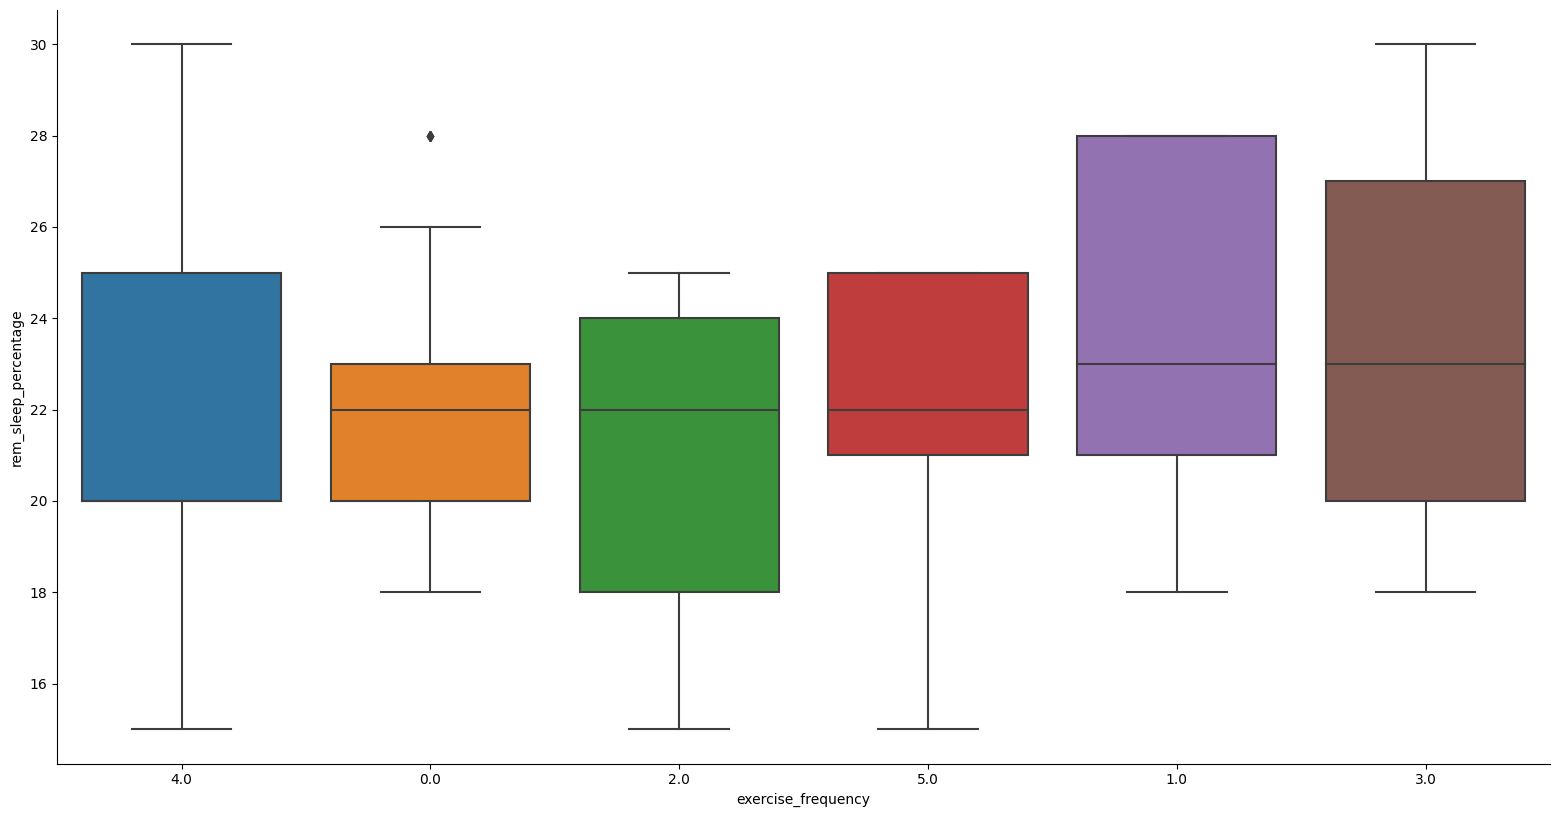

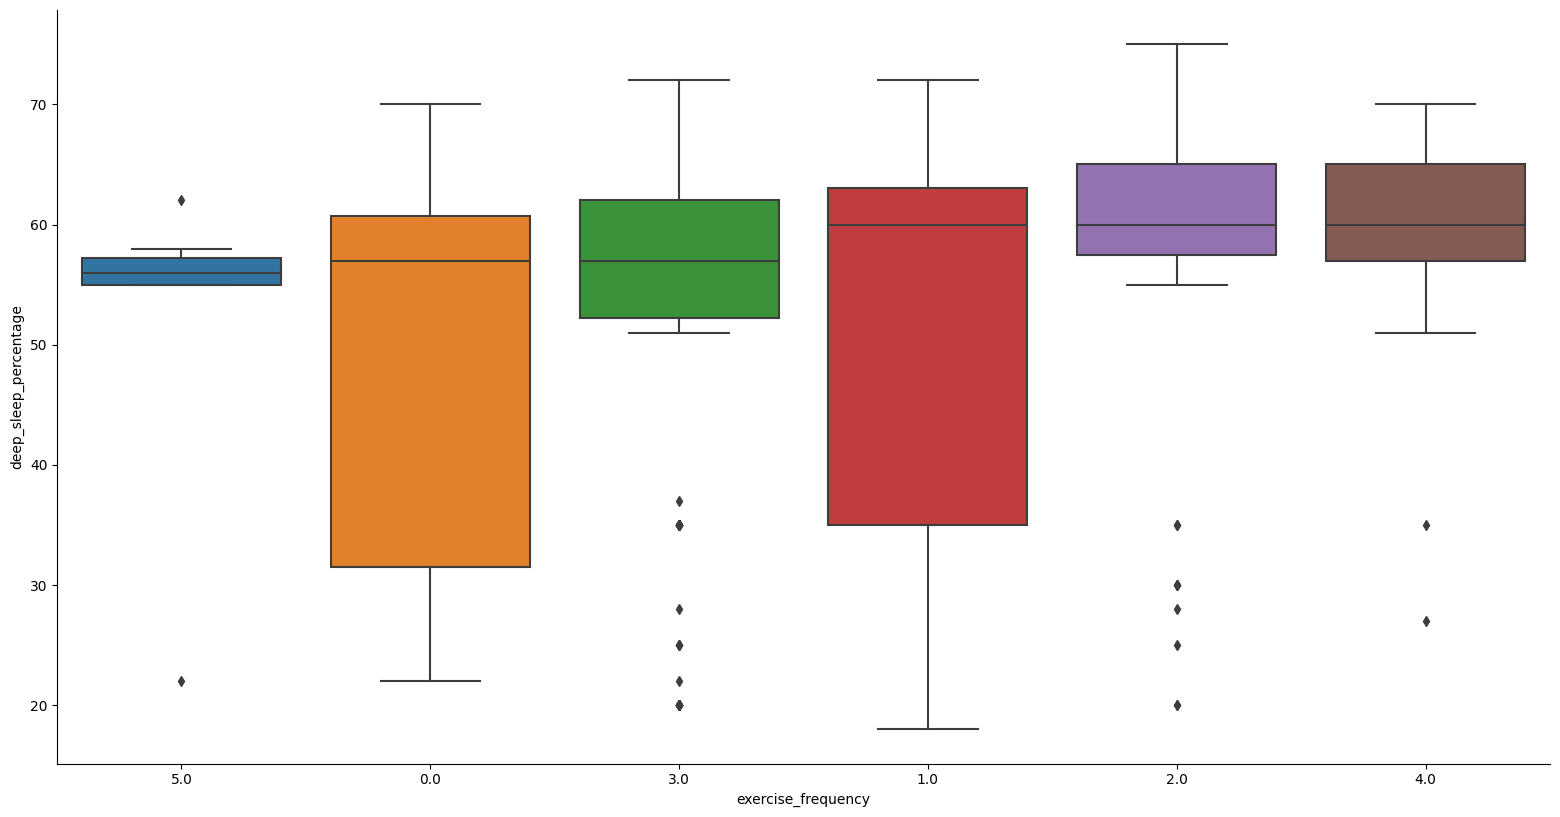

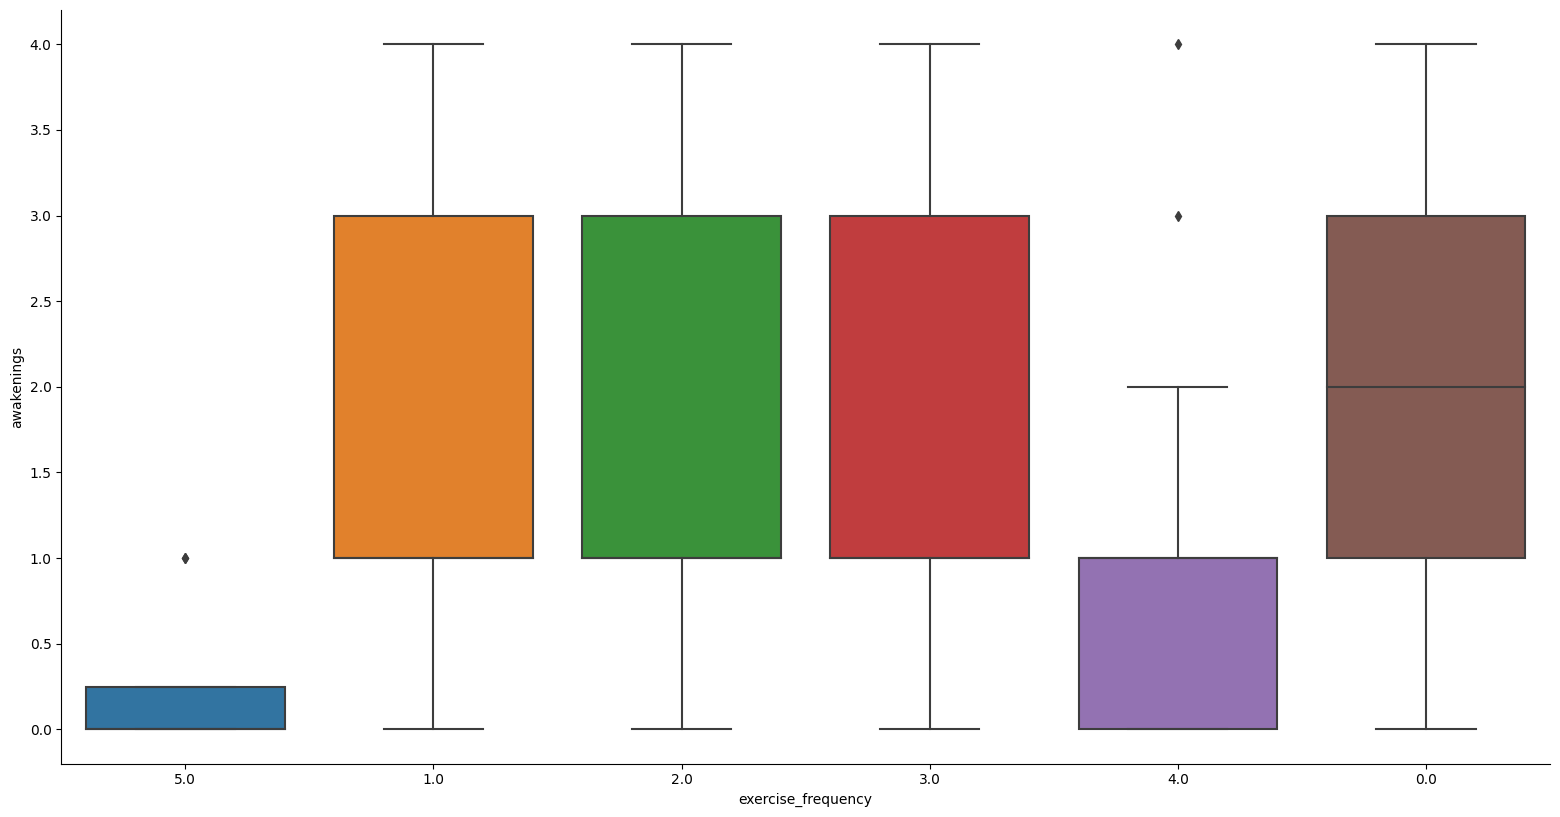

In [19]:
exercise = dataset.filter(['exercise_frequency', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in exercise:
    if var != 'exercise_frequency':
        tmp=exercise.filter(['exercise_frequency',var])
        sb.catplot(data=tmp, x='exercise_frequency', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('exercise_frequency')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Sleep efficiency generally increases with exercise frequency.

2. Although not a strong relation, deep sleep percentage generally increases with exercise frequency

3. There is no strong relation between exercise frequency and number of awakenings

Overall, some level of exercise does improve sleep quality but too much exercise can negatively affect sleep quality. However exercise frequency may not be that important of a factor that affects sleep quality as there are no strong trends observed as a whole. 

### Does Caffeine Consumption affect Sleep Quality?

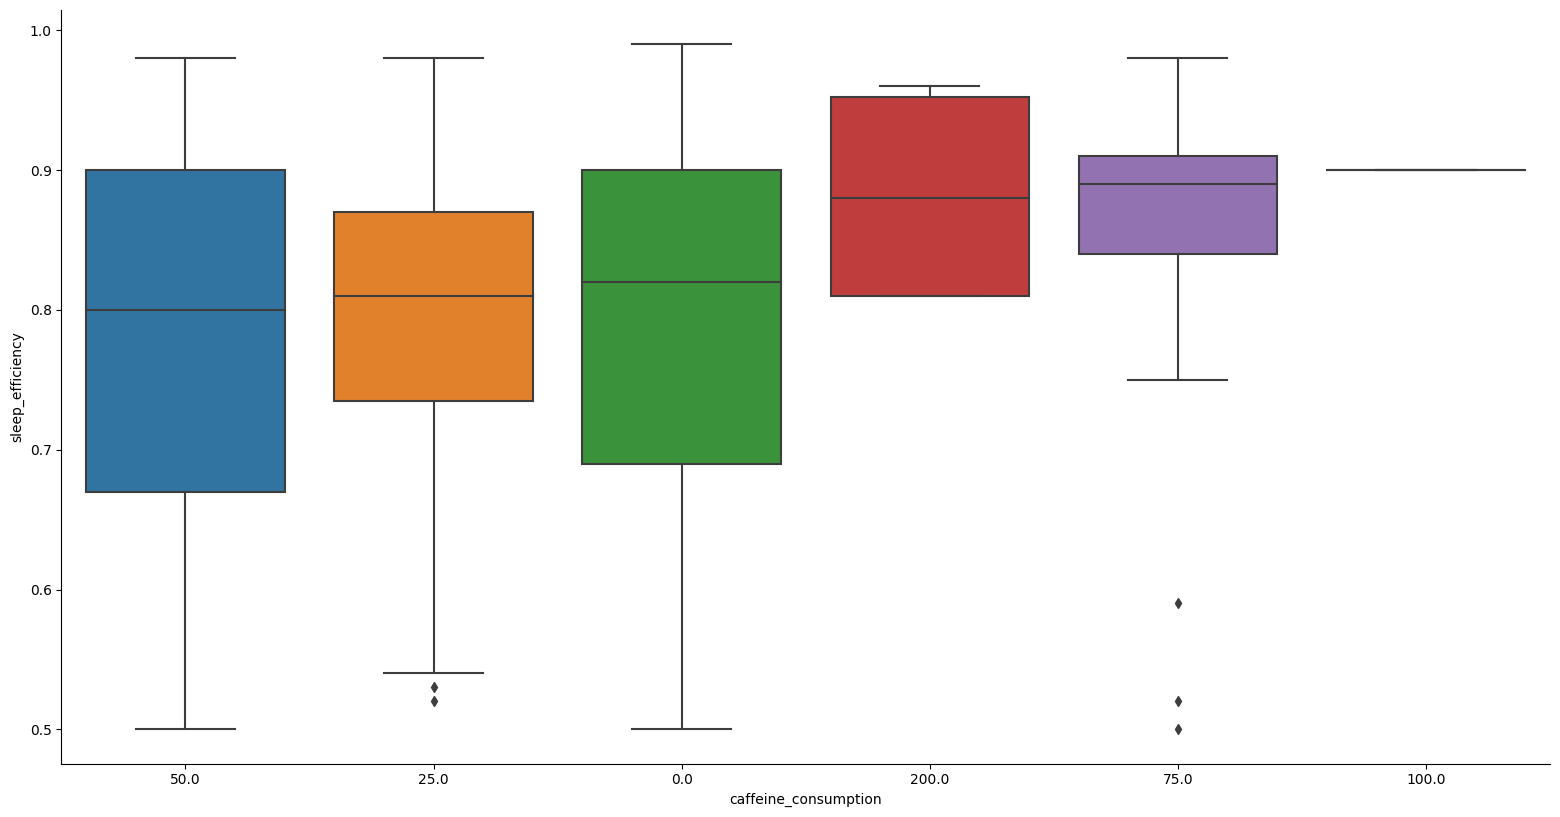

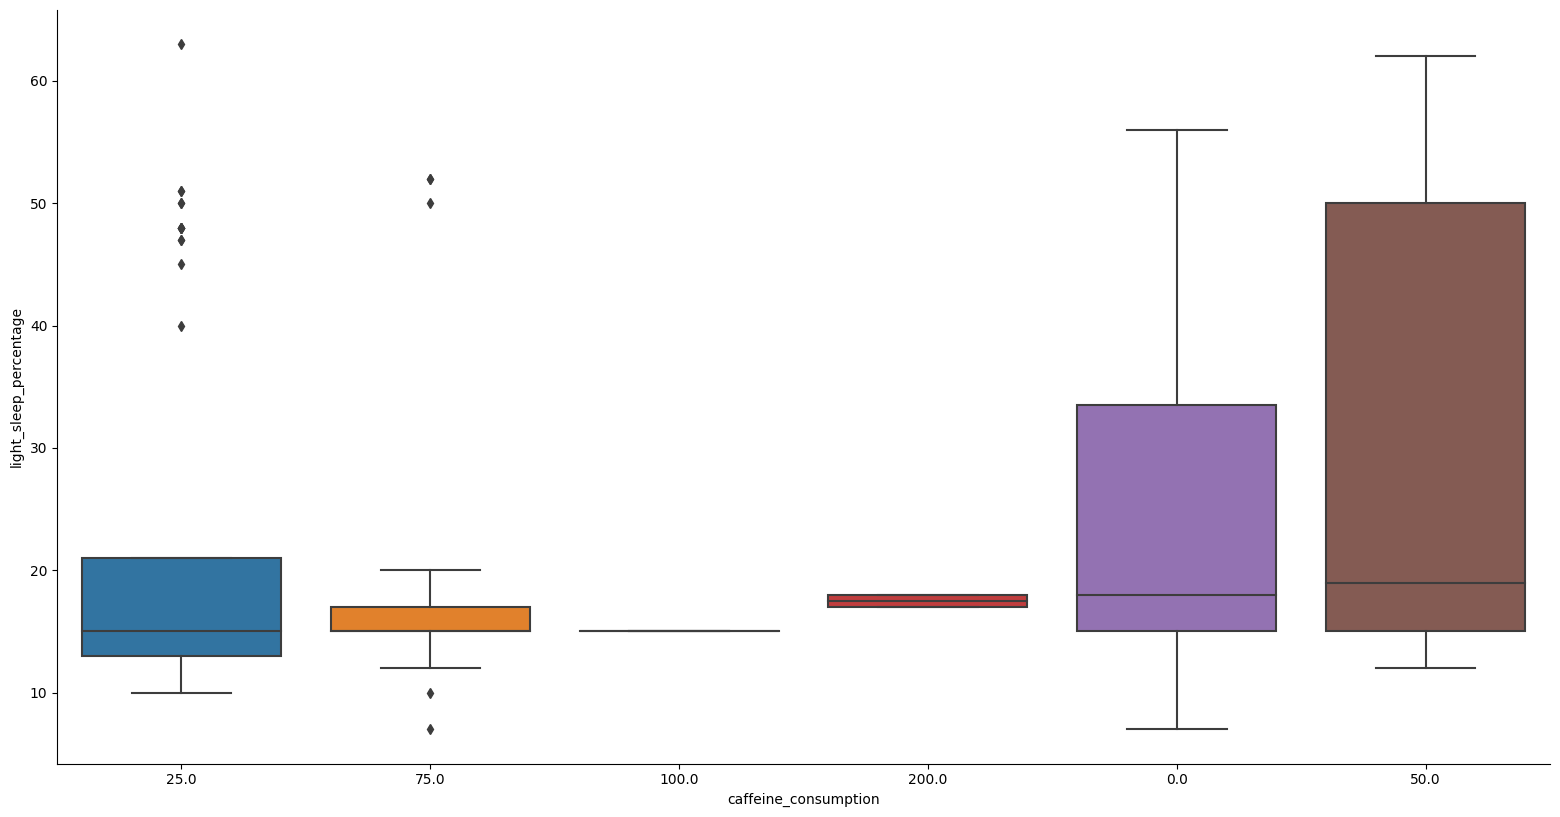

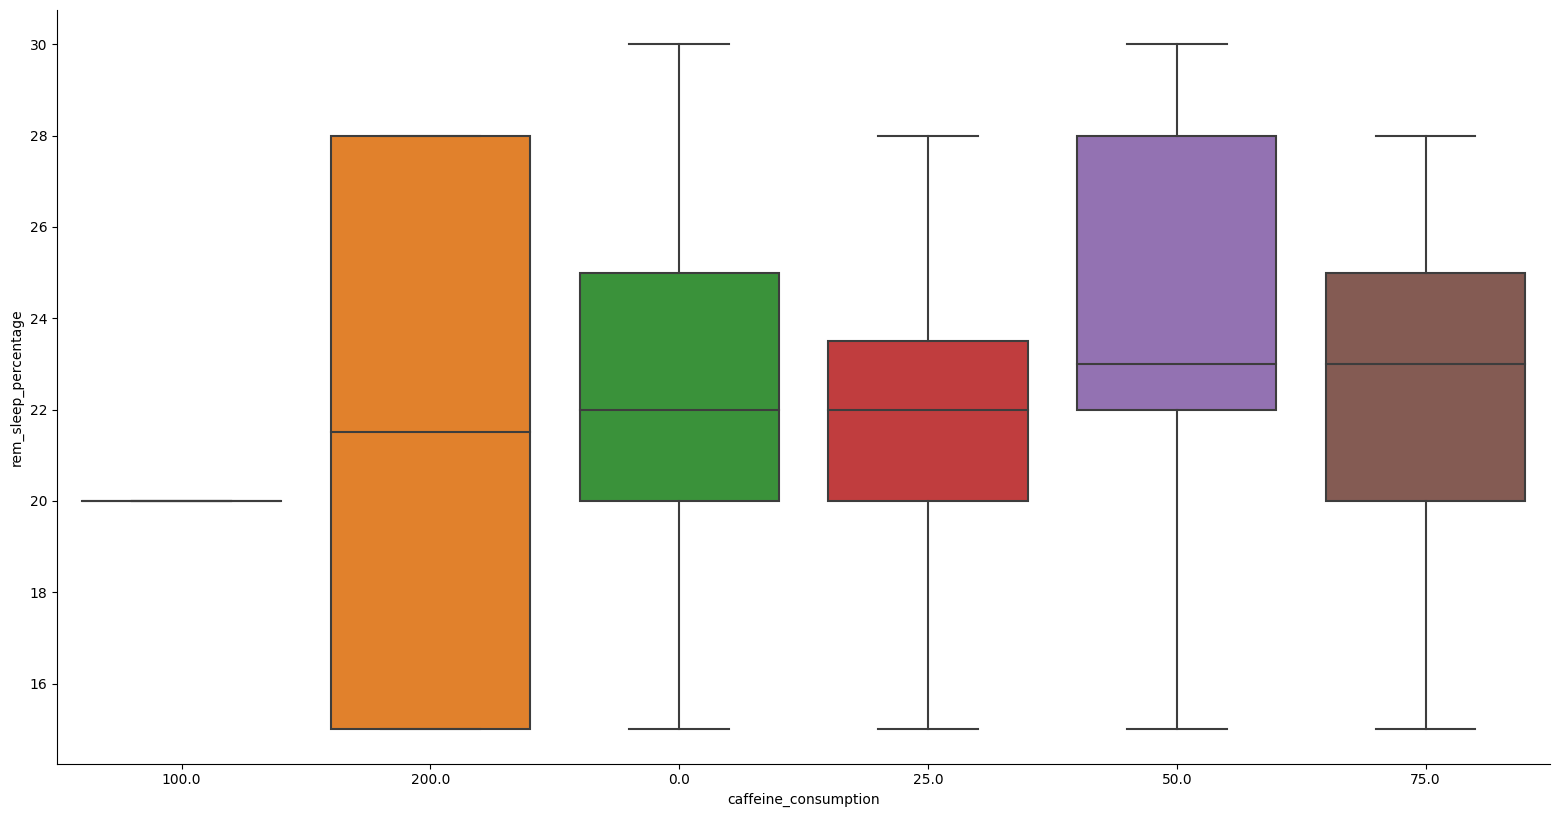

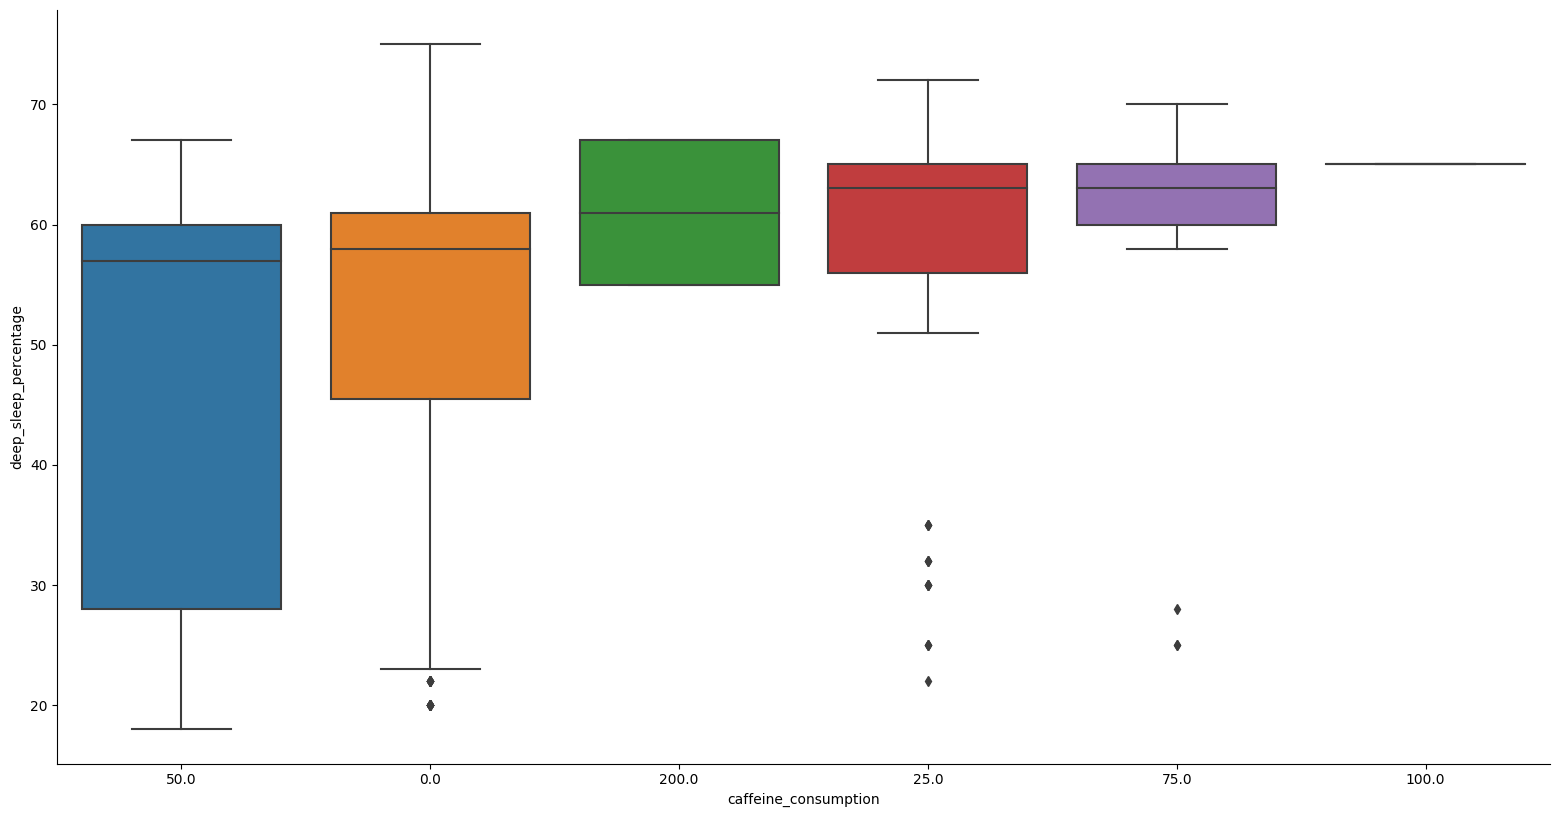

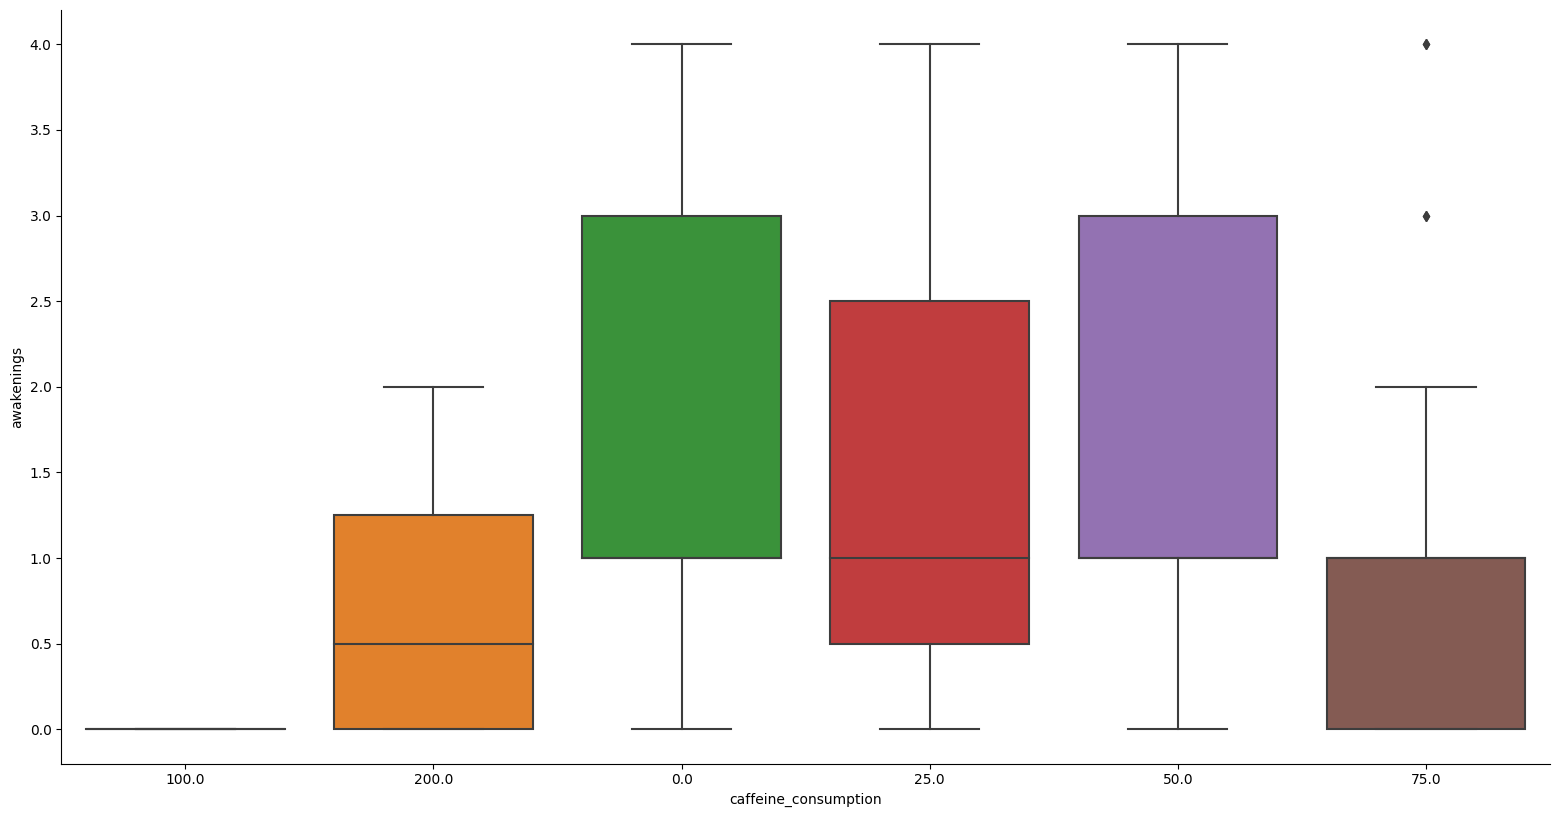

In [20]:
caffeine = dataset.filter(['caffeine_consumption', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in caffeine:
    if var != 'caffeine_consumption':
        tmp=caffeine.filter(['caffeine_consumption',var])
        sb.catplot(data=tmp, x='caffeine_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('caffeine_consumption')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. There is no trend observed for the relationship between caffeine consumption and sleep efficiency.

2. There is no trend observed for the relationship between caffeine consumption and deep sleep percentage.

3. There is no strong trend observed for the relationship between caffeine consumption and number of awakenings

Overall, caffeine consumption is not really an important factor that affects sleep quality.

### Does Alcohol Consumption affect Sleep Quality?

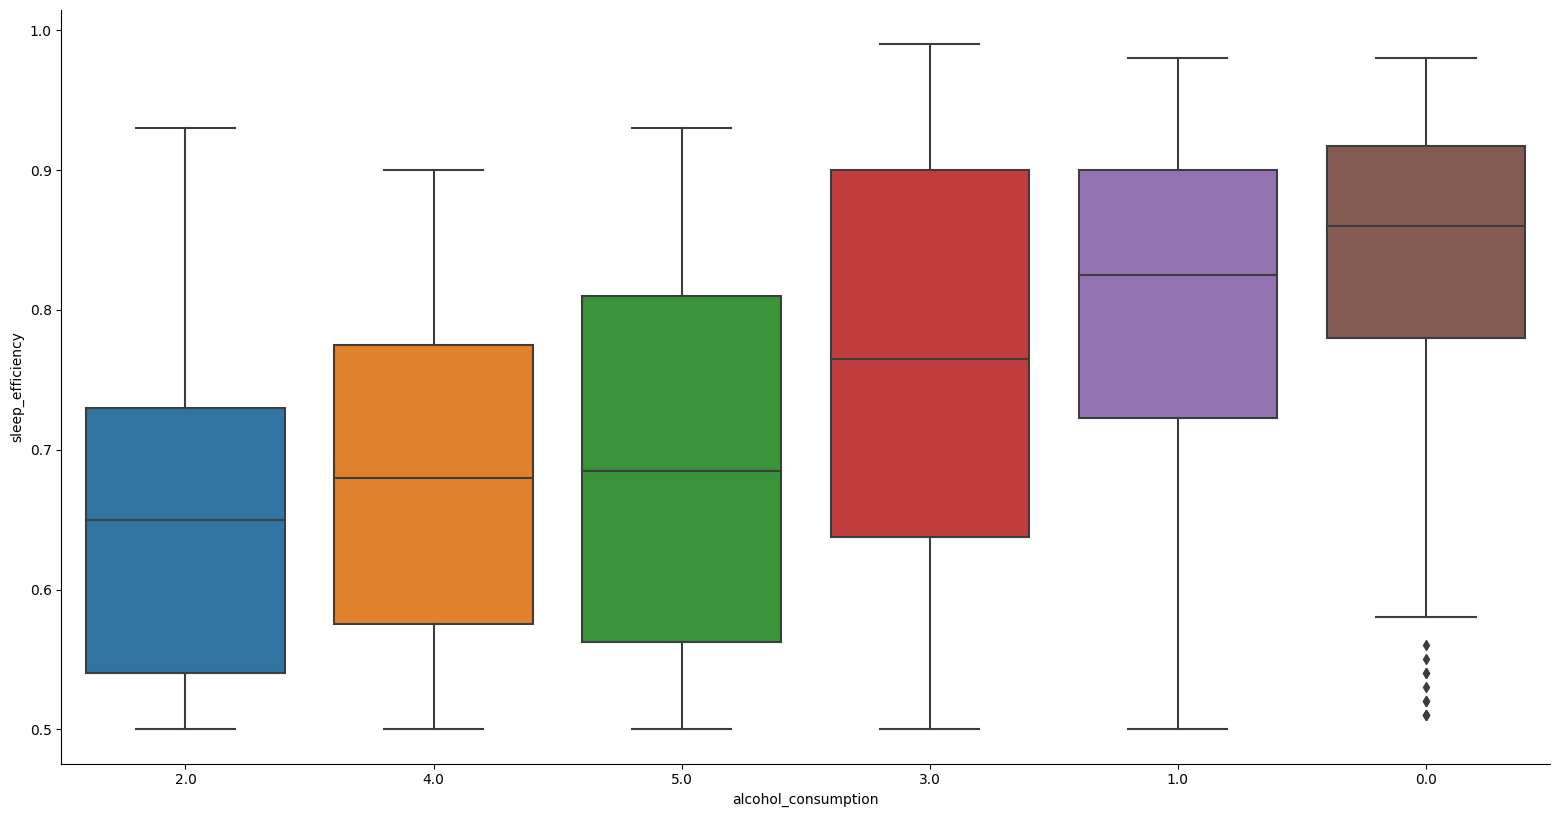

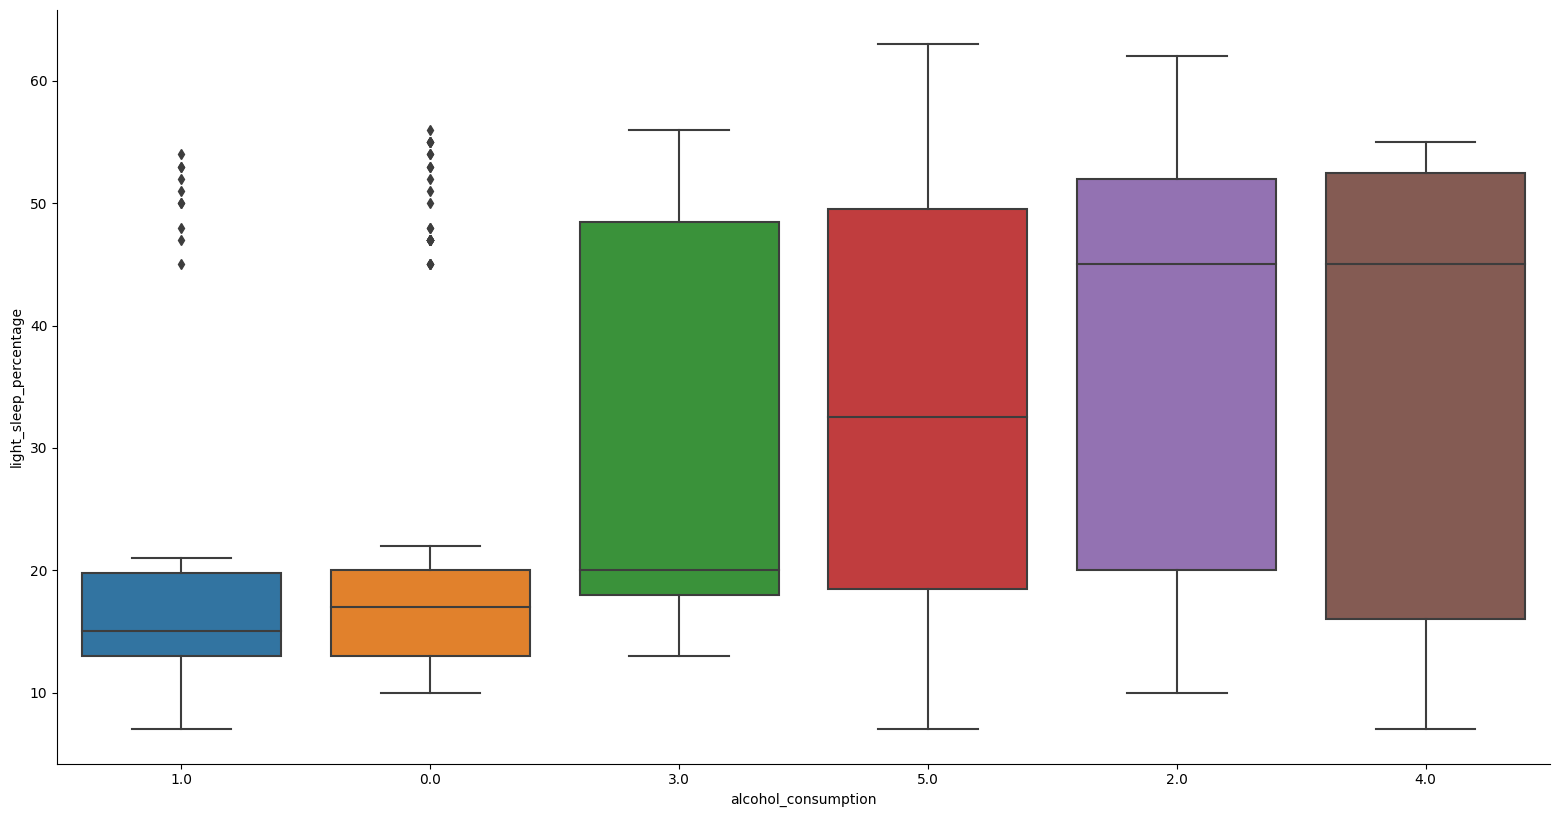

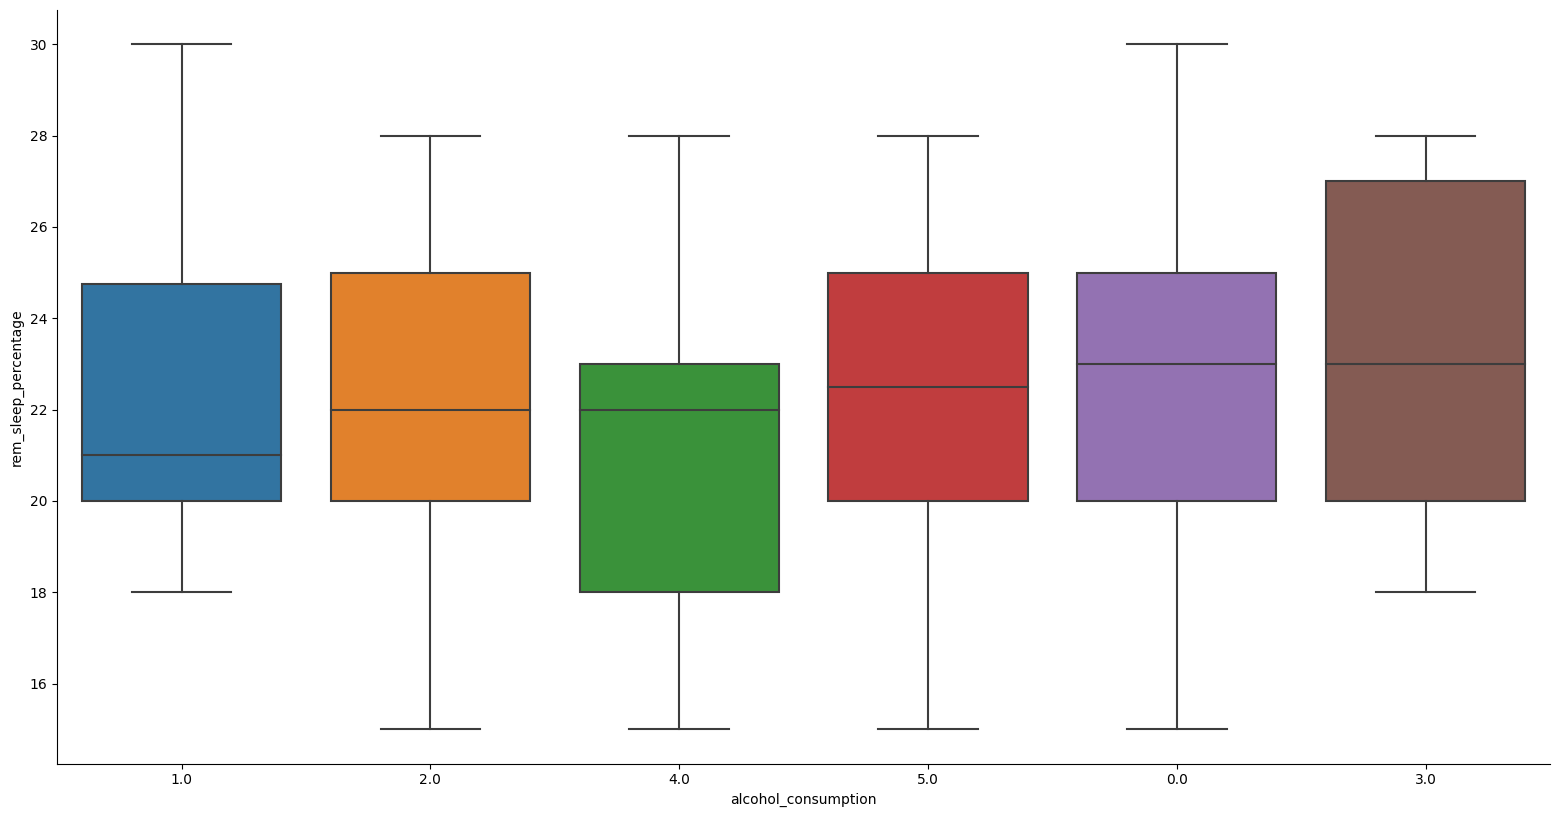

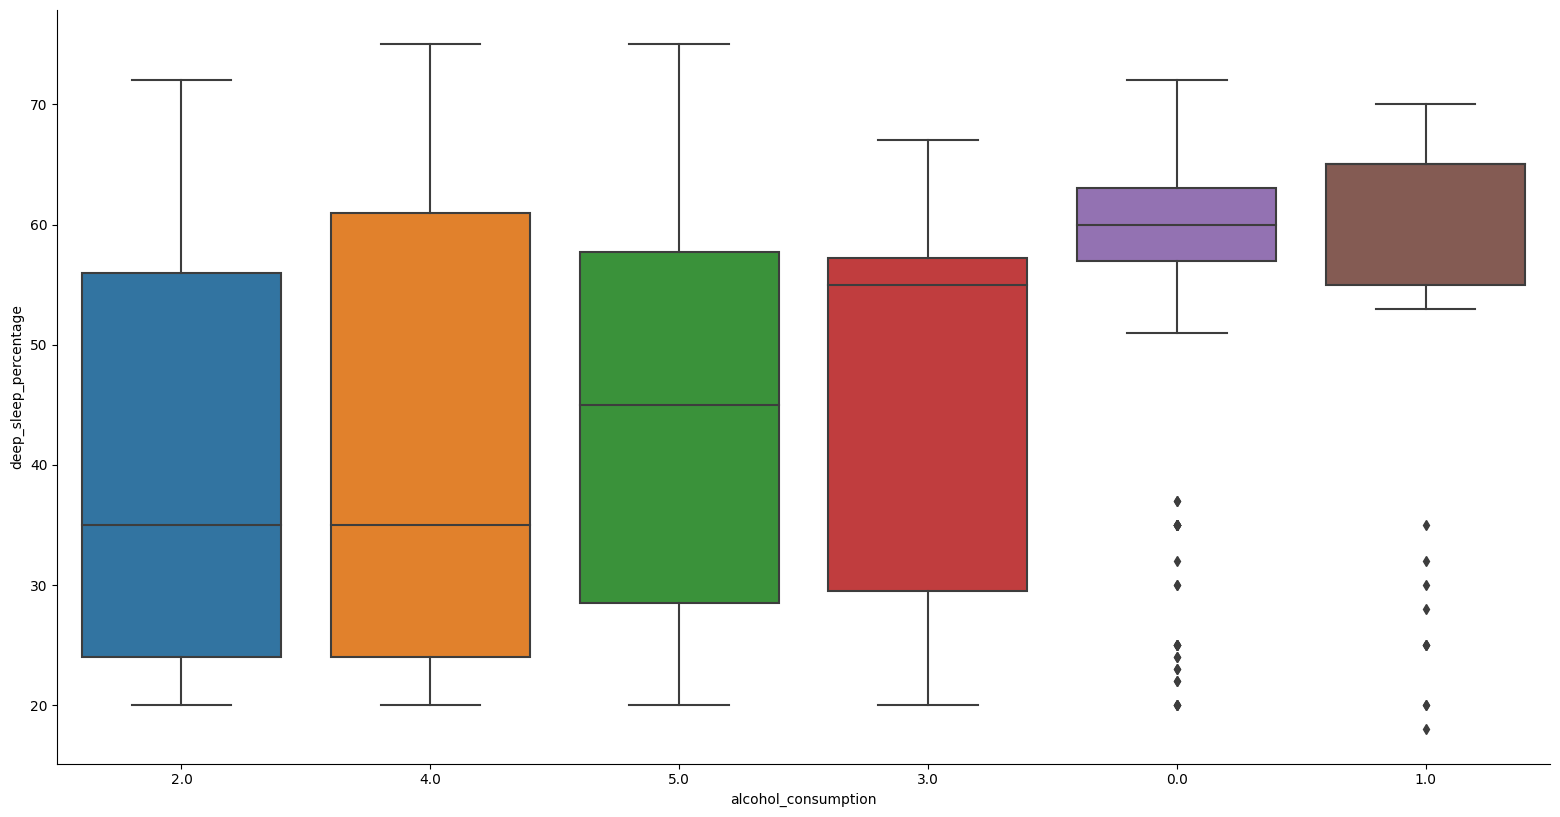

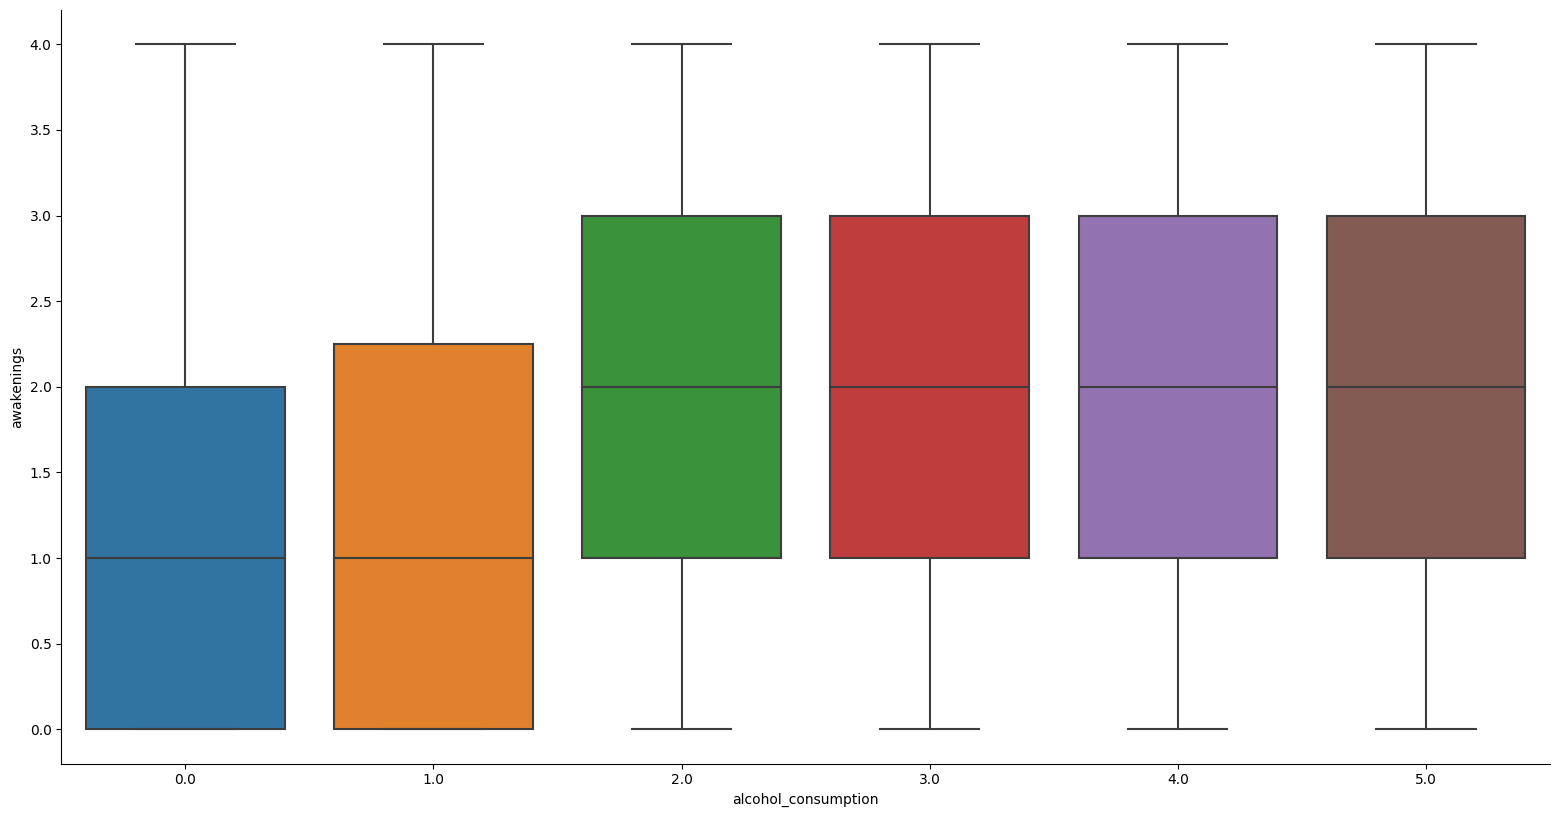

In [21]:
alcohol = dataset.filter(['alcohol_consumption','sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in alcohol:
    if var != 'alcohol_consumption':
        tmp=alcohol.filter(['alcohol_consumption',var])
        sb.catplot(data=tmp, x='alcohol_consumption', y=var, kind='box',height=8.27,aspect=15.7/8.27,
                   order=tmp.groupby('alcohol_consumption')[var].median().sort_values().index)

From the box plots above, we can deduce the following:

1. Generally, sleep efficiency is maximised when alcohol consumption is minimised.

2. Generally, deep sleep percentage increases with lower alcohol consumption. However, there are many outliers for alcohol consumption of 1.0 and 0 oz.

3. Generally, number of awakenings increases with increased alcohol consumption.

Overall, alcohol does affect sleep quality when consumed in excess. Ideally, sleep quality is maximised when no alcohol is consumed.

### Does Smoking affect Sleep Quality?

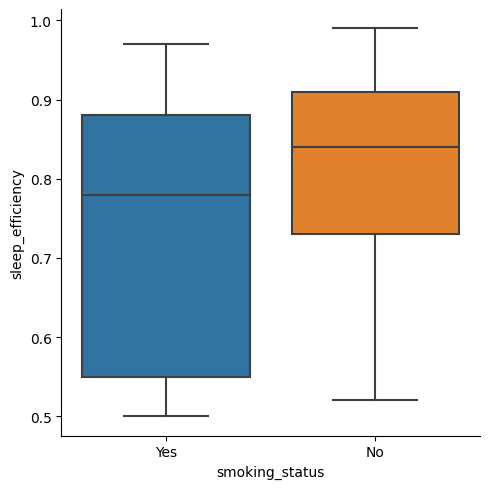

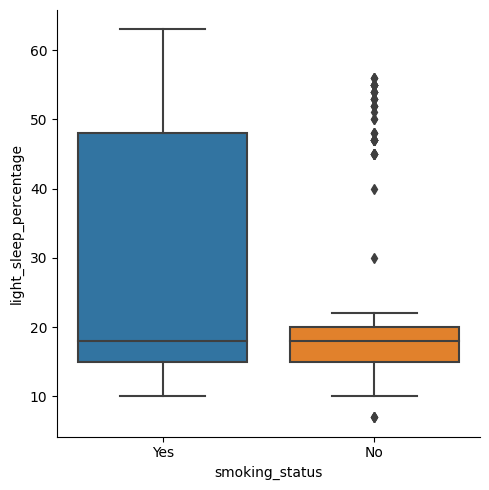

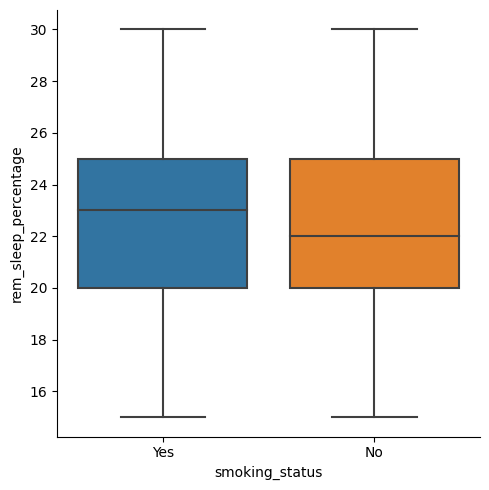

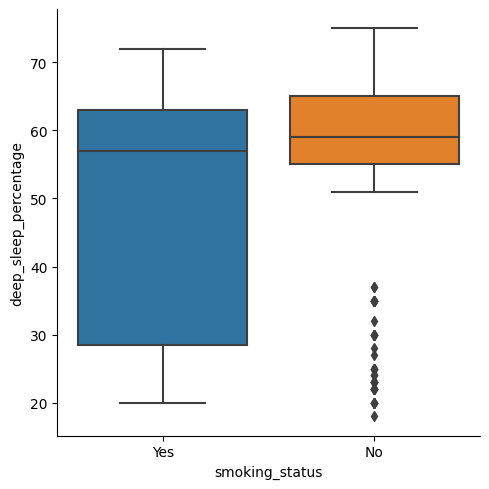

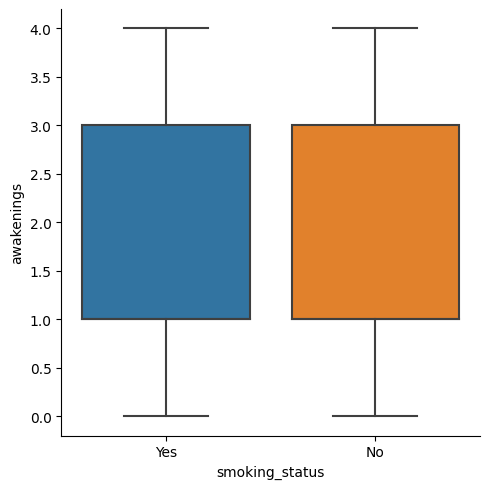

In [22]:
smoking = dataset.filter(['smoking_status', 'sleep_efficiency', 'light_sleep_percentage', 'rem_sleep_percentage', 'deep_sleep_percentage', 'awakenings'])

for var in smoking:
    if var != 'smoking_status':
        tmp=smoking.filter(['smoking_status',var])
        sb.catplot(data=tmp, x='smoking_status', y=var, kind='box')

From the box plots above, we can deduce the following:

1. Generally, smokers have lower sleep efficiency as compared to non-smokers.

2. Generally, smokers have a slightly lower deep sleep percentage as compared to non-smokers. However, there are many outliers that have low deep sleep percentage for non-smokers.

3. There is no relation between smoking status and number of awakenings.

From the analysis, we can observe that smoking decreases sleep efficiency but may not have a very strong impact of deep sleep percentage and has no effect on number of awakenings. Therefore, smoking is a factor that affects sleep quality although not as strong.